# Project 1: Ames Housing EDA Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

To create a regression based model to predict the **housing price using the Ames Housing Dataset**.

[Link to data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

## Executive Summary

Backstory behind the Ames housing data set

## Go straight to Exploratory Data Analysis


### Contents:
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Rename the columns](#Rename-Columns)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Merge DataFrames](#Merge-Dataframes)
- [Importing and transforming the test dataframe](#Importing-and-transforming-the-test-dataframe)
- [Creating the pipelines](#Creating-the-pipelines)
- [Model Benchmarks](#Model-Benchmarks)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [72]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [73]:
# Import graph style
plt.style.use('fivethirtyeight')

In [74]:
# Set the max rows and columns for Pandas
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

## Data Import and Cleaning

#### 1. Read In Data

Read in the`.csv` files

In [287]:
# Open the training set CSV data files
train_df = pd.read_csv('../datasets/train.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe

In [288]:
# View first 10 rows
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [77]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

#### Data Description

Answer: 

The data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from *2006 to 2010*.

A total of **2930 observations** and **81 columns** can be found in the data set.

Variables are categorized into the following:
* 23 nominal, 
* 23 ordinal, 
* 14 discrete
* 20 continuous variables 
* 2 additional observation identifiers

# Cleaning the dataset

In [78]:
# Define a funtion to check the percentage of missing values
def pct_missing_value(data,col):
    missing_dict = dict()
    for c in col:
        missing_dict[c] = round((data[c].isnull().sum() / len(data[c])) * 100,2)
    return missing_dict

In [79]:
dict_missing = pct_missing_value(train_df, ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
                                            'Lot Frontage', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual',
                                            'Garage Cond', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2',
                                            'BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual', 'Mas Vnr Area',
                                            'Mas Vnr Type', 'Bsmt Half Bath', 'Bsmt Full Bath'])
dict_missing

{'Pool QC': 99.56,
 'Misc Feature': 96.83,
 'Alley': 93.17,
 'Fence': 80.5,
 'Fireplace Qu': 48.76,
 'Lot Frontage': 16.09,
 'Garage Yr Blt': 5.56,
 'Garage Finish': 5.56,
 'Garage Qual': 5.56,
 'Garage Cond': 5.56,
 'Garage Type': 5.51,
 'Bsmt Exposure': 2.83,
 'BsmtFin Type 2': 2.73,
 'BsmtFin Type 1': 2.68,
 'Bsmt Cond': 2.68,
 'Bsmt Qual': 2.68,
 'Mas Vnr Area': 1.07,
 'Mas Vnr Type': 1.07,
 'Bsmt Half Bath': 0.1,
 'Bsmt Full Bath': 0.1}

<AxesSubplot:title={'center':'Mising values for each feature'}, xlabel='Features', ylabel='%'>

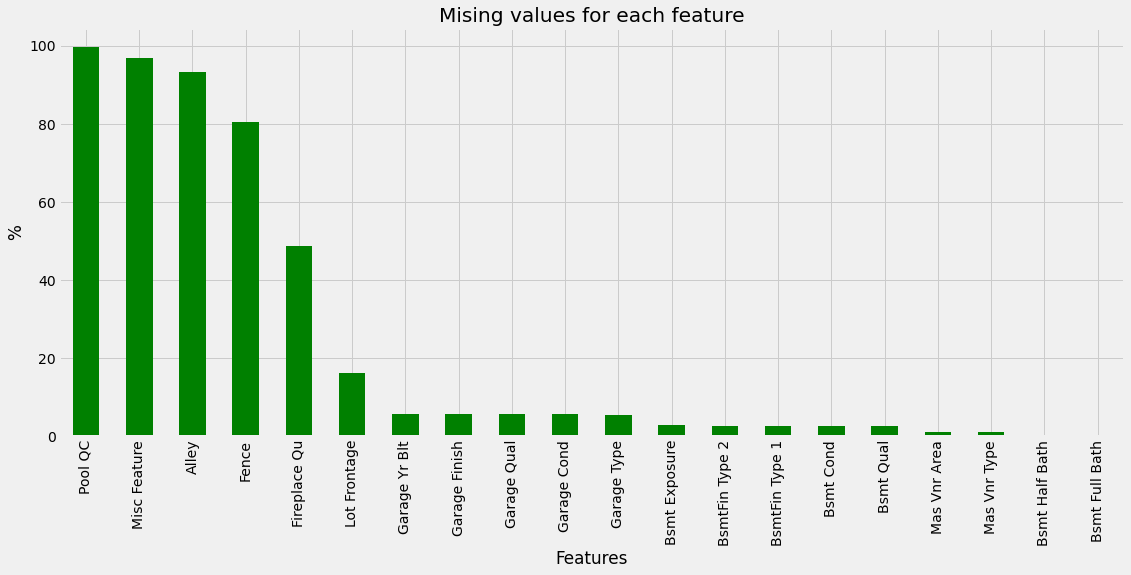

In [80]:
missing_data_pct = pd.Series(dict_missing)
missing_data_pct.plot(kind='bar', figsize=(17, 7), color='green',
                      title='Mising values for each feature', xlabel='Features', ylabel='%')

Top missing values in the data set, **drop the columns with percentages greater than 80%**

These features need to be dropped: *'Pool QC', 'Misc Feature', 'Alley', 'Fence'

In [81]:
train_df = train_df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

In [82]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [289]:
# Will use Id as reference when merging data frames 
train_df_id = train_df['Id'].copy()
train_df_id

0        109
1        544
2        153
3        318
4        255
        ... 
2046    1587
2047     785
2048     916
2049     639
2050      10
Name: Id, Length: 2051, dtype: int64

In [84]:
# Columns to drop: 'PID', no correlation with price
# Will use Id as reference when merging data frames

train_df = train_df.drop(['Id', 'PID'], axis=1)
train_df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


### Selecting the numeric variables

In [85]:
# Select the numeric variables with int64, float64

# Overall Qual, Overall Cond are ordinal variables in the train_df_num, will need to drop them and add to the train_df_cat

train_df_num = train_df.select_dtypes(['int64', 'float64']).drop(
    ['Kitchen AbvGr', 'Overall Qual', 'Overall Cond'], axis=1).copy()
train_df_num.head()

,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,60,NaN,13517,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500
1,60,43.0,11492,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000
2,20,68.0,7922,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000
3,60,73.0,9802,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000
4,50,82.0,14235,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500


In [86]:
# Overall Qual, Overall Cond are ordinal variables

train_df_num_overall_qual_cond = train_df[['Overall Qual', 'Overall Cond']]

### Selecting the categorical variables

In [87]:
# Select the categorical variables
train_df_cat = train_df.select_dtypes(['object']).copy()
train_df_cat.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,TA,Y,WD
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,BuiltIn,Fin,TA,TA,Y,WD
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,WD


In [88]:
# Not required as adding them back to the numeric variables
# Concatenating the train_df_num_ord with train_df_cat
# train_df_cat = pd.concat([train_df_cat, train_df_num_ord], axis=1)
# train_df_cat.head()

### Cleaning the train_df_num

<AxesSubplot:title={'center':"Numeric Dataframe Columns with 0's in them"}>

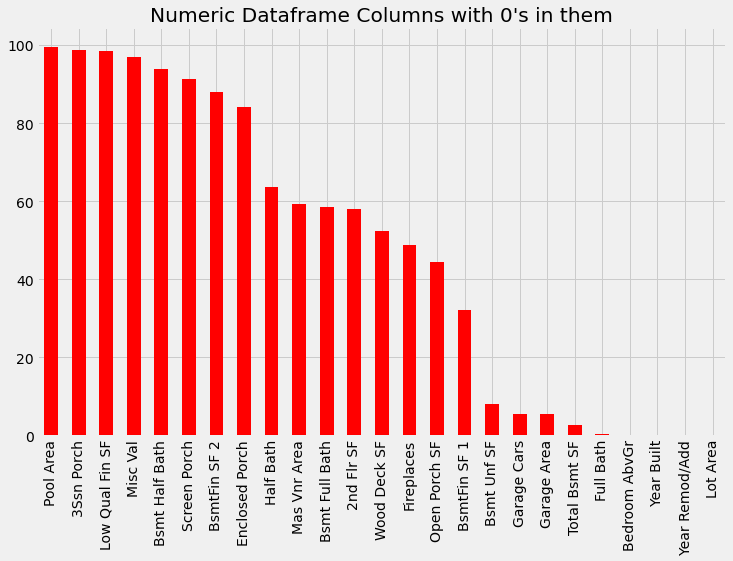

In [89]:
# Count the columns with values with 0's in them
train_df_with_0 = (((train_df_num.isin([0]).sum() / len(train_df_num)) * 100).sort_values(ascending=False)).iloc[:-9]

train_df_with_0.sort_values(ascending=False).plot(kind='bar',
                                                  figsize=(11, 7), title='Numeric Dataframe Columns with 0\'s in them', color='red')

In [90]:
train_df_with_0

Pool Area          99.561190
3Ssn Porch         98.732326
Low Qual Fin SF    98.391029
Misc Val           96.830814
Bsmt Half Bath     93.759142
Screen Porch       91.175037
BsmtFin SF 2       87.908337
Enclosed Porch     84.056558
Half Bath          63.773769
Mas Vnr Area       59.288152
Bsmt Full Bath     58.508045
2nd Flr SF         58.069235
Wood Deck SF       52.413457
Fireplaces         48.756704
Open Porch SF      44.466114
BsmtFin SF 1       32.033155
Bsmt Unf SF         8.044856
Garage Cars         5.509508
Garage Area         5.509508
Total Bsmt SF       2.632862
Full Bath           0.390054
Bedroom AbvGr       0.243784
Year Remod/Add      0.000000
Year Built          0.000000
Lot Area            0.000000
dtype: float64

In [91]:
# Find the correlation for features will 0's in them with SalePrice
train_df_with_0 = pd.concat([train_df[train_df_with_0.index],train_df['SalePrice']],axis=1)
train_df_with_0.head()

,Pool Area,3Ssn Porch,Low Qual Fin SF,Misc Val,Bsmt Half Bath,Screen Porch,BsmtFin SF 2,Enclosed Porch,Half Bath,Mas Vnr Area,Bsmt Full Bath,2nd Flr SF,Wood Deck SF,Fireplaces,Open Porch SF,BsmtFin SF 1,Bsmt Unf SF,Garage Cars,Garage Area,Total Bsmt SF,Full Bath,Bedroom AbvGr,Year Remod/Add,Year Built,Lot Area,SalePrice
0,0,0,0,0,0.0,0,0.0,0,1,289.0,0.0,754,0,0,44,533.0,192.0,2.0,475.0,725.0,2,3,2005,1976,13517,130500
1,0,0,0,0,0.0,0,0.0,0,1,132.0,1.0,1209,0,1,74,637.0,276.0,2.0,559.0,913.0,2,4,1997,1996,11492,220000
2,0,0,0,0,0.0,0,0.0,0,0,0.0,1.0,0,0,0,52,731.0,326.0,1.0,246.0,1057.0,1,3,2007,1953,7922,109000
3,0,0,0,0,0.0,0,0.0,0,1,0.0,0.0,700,100,0,0,0.0,384.0,2.0,400.0,384.0,2,3,2007,2006,9802,174000
4,0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,614,0,0,59,0.0,676.0,2.0,484.0,676.0,2,3,1993,1900,14235,138500


In [92]:
def corr_heatmap(dataframe, label='test', cmap='coolwarm'):
    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(25,20))

    sns.heatmap(dataframe.corr(), annot=True, mask=mask, cmap=cmap, annot_kws={'fontsize':14})
    plt.title('Correlation of features of ' + label + ' variables')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

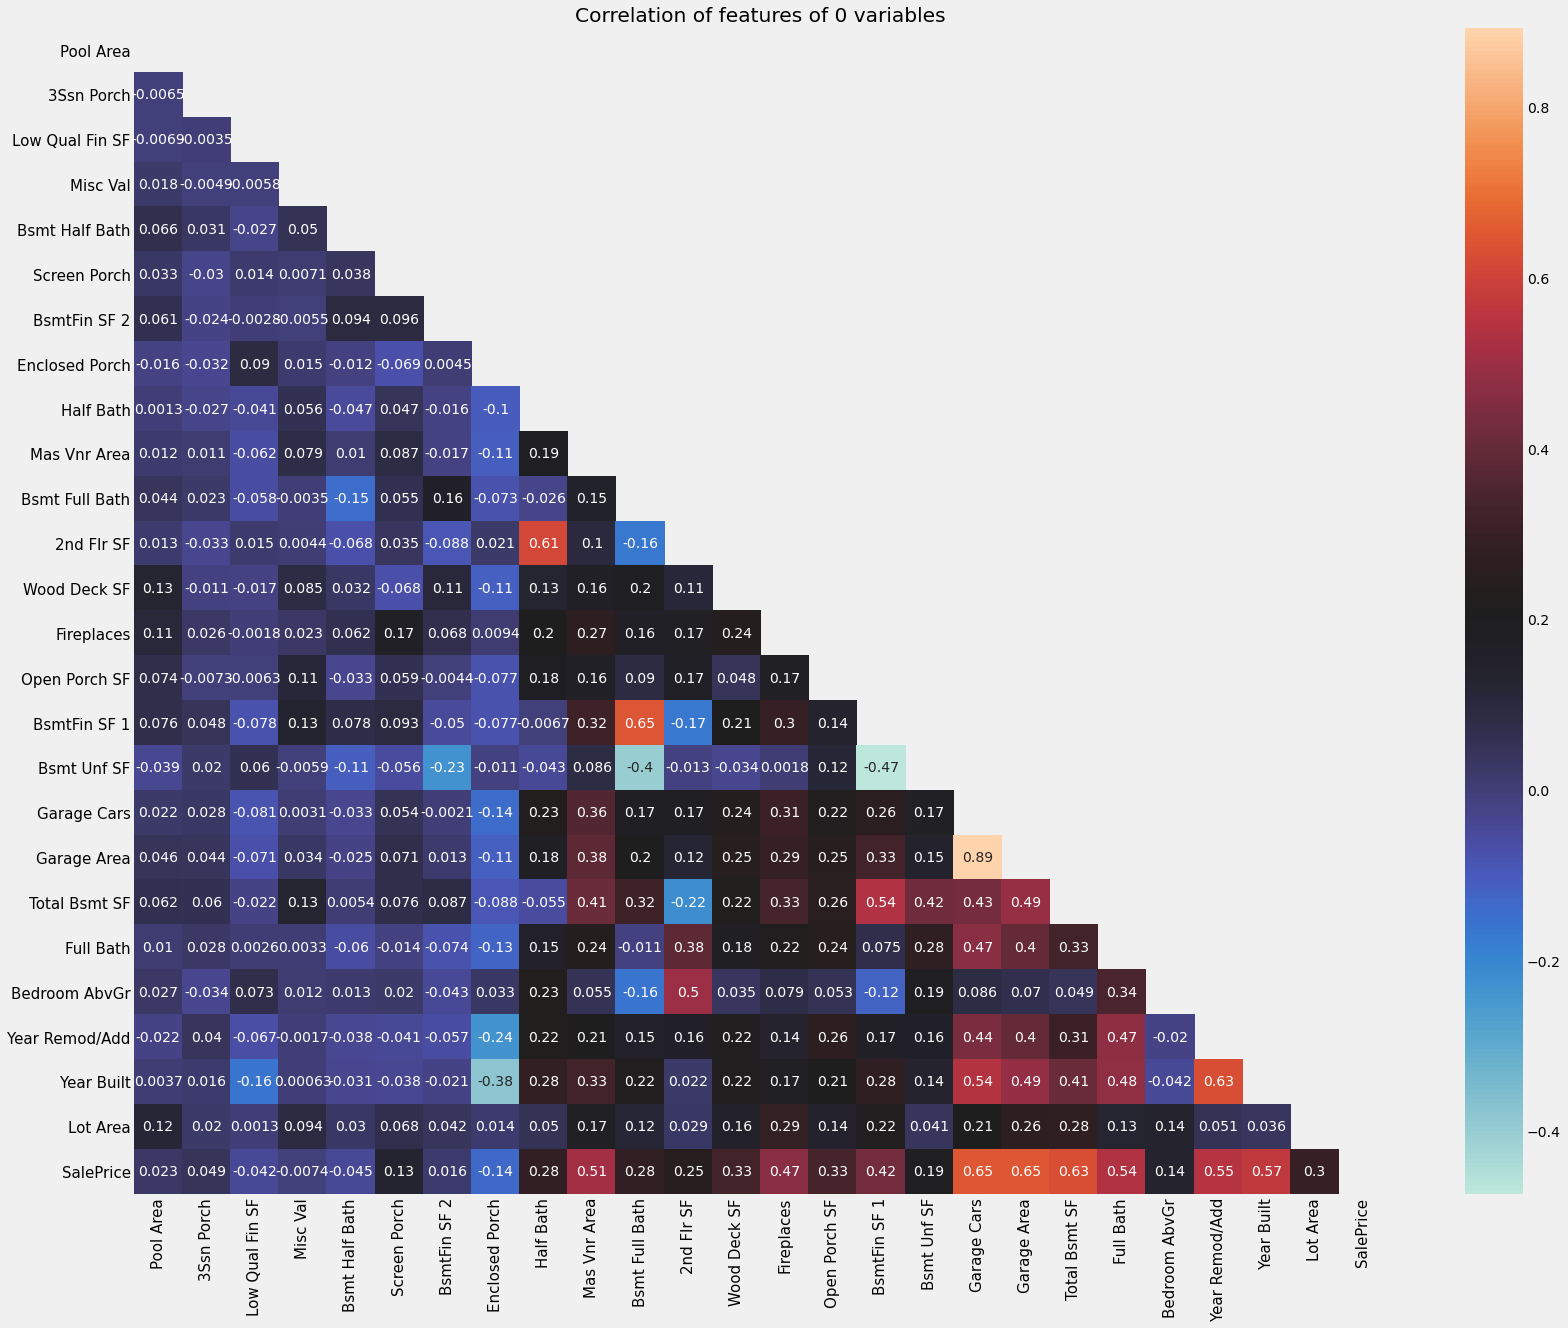

In [93]:
# Heatmap correlation of columns with 0's with SalePrice

corr_heatmap(train_df_with_0, '0', 'icefire')

In [94]:
def single_corr_heatmap(dataframe, feature, colormap='icefire'):
    df_corr = pd.DataFrame(dataframe.corr()[feature]).sort_values(feature, ascending=False)
    plt.figure(figsize=(11,7))
    sns.heatmap(df_corr, cmap=colormap, annot=True)
    if len(feature) > 1:
        plt.title('Correlation of numeric features with ' + ", ".join(feature), fontsize=15, pad=15)
    else:
        plt.title('Correlation of numeric features with ' + "".join(feature), fontsize=15, pad=15)
    plt.xlabel('')
    plt.ylabel('')

# single_corr_heatmap(train_df_with_0, ['SalePrice'])

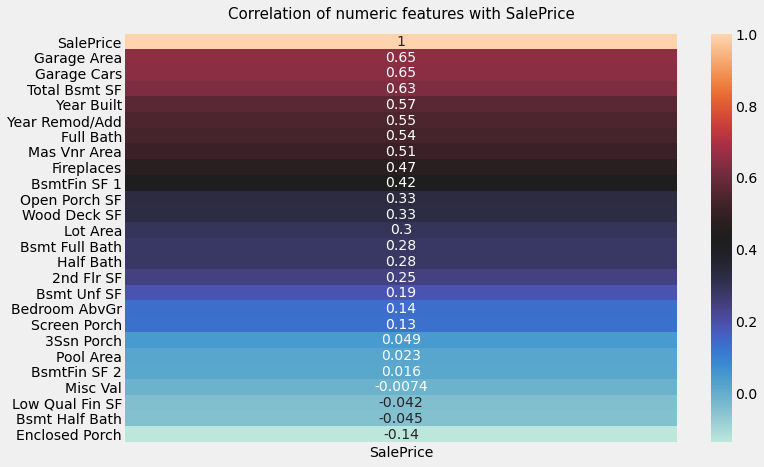

In [95]:
single_corr_heatmap(train_df_with_0, ['SalePrice'])

In [96]:
train_df_with_0.columns

Index(['Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val',
       'Bsmt Half Bath', 'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch',
       'Half Bath', 'Mas Vnr Area', 'Bsmt Full Bath', '2nd Flr SF',
       'Wood Deck SF', 'Fireplaces', 'Open Porch SF', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Garage Cars', 'Garage Area', 'Total Bsmt SF',
       'Full Bath', 'Bedroom AbvGr', 'Year Remod/Add', 'Year Built',
       'Lot Area', 'SalePrice'],
      dtype='object')

Based on the correlation heatmap, the following numeric columns with a lot of 0's in them have **very little correlation with price**:
* Pool Area (99.5%, 0.023) (Almost all houses do not have pools, will **drop pool related features**)
* 3Ssn Porch (98.7%, 0.049)
* Low Qual Fin SF (98.39%, -0.042)
* Misc Val (96.83%, -0.0074) (Almost all houses do not have Miscellaneous features)
* Bsmt Half Bath (93.7%, -0.045) 
* Screen Porch (91.17%, 0.13)
* BsmtFin SF 2 (87.9%, 0.016)
* Enclosed Porch (84.05%, -0.14)
* Bsmt Unf SF (8.04%, 0.19)

**These features will be dropped in train_df_num**

In [97]:
# Drop the numeric columns with the most 0's and with the least correlation against price
train_df_num = train_df_num.drop(['Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val',
       'Bsmt Half Bath', 'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch',
       'Bsmt Unf SF'], axis=1)
train_df_num.head()

,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
0,60,NaN,13517,1976,2005,289.0,533.0,725.0,725,754,1479,0.0,2,1,3,6,0,1976.0,2.0,475.0,0,44,3,2010,130500
1,60,43.0,11492,1996,1997,132.0,637.0,913.0,913,1209,2122,1.0,2,1,4,8,1,1997.0,2.0,559.0,0,74,4,2009,220000
2,20,68.0,7922,1953,2007,0.0,731.0,1057.0,1057,0,1057,1.0,1,0,3,5,0,1953.0,1.0,246.0,0,52,1,2010,109000
3,60,73.0,9802,2006,2007,0.0,0.0,384.0,744,700,1444,0.0,2,1,3,7,0,2007.0,2.0,400.0,100,0,4,2010,174000
4,50,82.0,14235,1900,1993,0.0,0.0,676.0,831,614,1445,0.0,2,0,3,6,0,1957.0,2.0,484.0,0,59,3,2010,138500


In [98]:
train_df_num.head()

,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
0,60,NaN,13517,1976,2005,289.0,533.0,725.0,725,754,1479,0.0,2,1,3,6,0,1976.0,2.0,475.0,0,44,3,2010,130500
1,60,43.0,11492,1996,1997,132.0,637.0,913.0,913,1209,2122,1.0,2,1,4,8,1,1997.0,2.0,559.0,0,74,4,2009,220000
2,20,68.0,7922,1953,2007,0.0,731.0,1057.0,1057,0,1057,1.0,1,0,3,5,0,1953.0,1.0,246.0,0,52,1,2010,109000
3,60,73.0,9802,2006,2007,0.0,0.0,384.0,744,700,1444,0.0,2,1,3,7,0,2007.0,2.0,400.0,100,0,4,2010,174000
4,50,82.0,14235,1900,1993,0.0,0.0,676.0,831,614,1445,0.0,2,0,3,6,0,1957.0,2.0,484.0,0,59,3,2010,138500


In [99]:
# Plot the heatmap of the numeric variables
# plt.figure(figsize=(11,7))
# sns.heatmap(data=train_df_num.corr()['SalePrice'],annot=True, cmap='viridis')

train_df_num.corr()['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
Gr Liv Area       0.697038
Garage Area       0.650270
Garage Cars       0.648220
Total Bsmt SF     0.628925
1st Flr SF        0.618486
Year Built        0.571849
Year Remod/Add    0.550370
Full Bath         0.537969
Garage Yr Blt     0.533922
Mas Vnr Area      0.512230
TotRms AbvGrd     0.504014
Fireplaces        0.471093
BsmtFin SF 1      0.423519
Lot Frontage      0.341842
Open Porch SF     0.333476
Wood Deck SF      0.326490
Lot Area          0.296566
Bsmt Full Bath    0.283662
Half Bath         0.283001
2nd Flr SF        0.248452
Bedroom AbvGr     0.137067
Mo Sold           0.032735
Yr Sold          -0.015203
MS SubClass      -0.087335
Name: SalePrice, dtype: float64

In [100]:
train_df_num.drop('SalePrice', axis=1, inplace=True)

In [101]:
# Missing values in train_df_num
train_df_num.isnull().sum().sort_values(ascending=False) / len(train_df_num.isnull().sum().sort_values(ascending=False))

Lot Frontage      13.750000
Garage Yr Blt      4.750000
Mas Vnr Area       0.916667
Bsmt Full Bath     0.083333
Garage Area        0.041667
Garage Cars        0.041667
BsmtFin SF 1       0.041667
Total Bsmt SF      0.041667
2nd Flr SF         0.000000
Lot Area           0.000000
Year Built         0.000000
Year Remod/Add     0.000000
1st Flr SF         0.000000
Yr Sold            0.000000
Gr Liv Area        0.000000
Mo Sold            0.000000
Full Bath          0.000000
Half Bath          0.000000
Bedroom AbvGr      0.000000
TotRms AbvGrd      0.000000
Fireplaces         0.000000
Wood Deck SF       0.000000
Open Porch SF      0.000000
MS SubClass        0.000000
dtype: float64

In [102]:
train_df_num.head()

,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold
0,60,NaN,13517,1976,2005,289.0,533.0,725.0,725,754,1479,0.0,2,1,3,6,0,1976.0,2.0,475.0,0,44,3,2010
1,60,43.0,11492,1996,1997,132.0,637.0,913.0,913,1209,2122,1.0,2,1,4,8,1,1997.0,2.0,559.0,0,74,4,2009
2,20,68.0,7922,1953,2007,0.0,731.0,1057.0,1057,0,1057,1.0,1,0,3,5,0,1953.0,1.0,246.0,0,52,1,2010
3,60,73.0,9802,2006,2007,0.0,0.0,384.0,744,700,1444,0.0,2,1,3,7,0,2007.0,2.0,400.0,100,0,4,2010
4,50,82.0,14235,1900,1993,0.0,0.0,676.0,831,614,1445,0.0,2,0,3,6,0,1957.0,2.0,484.0,0,59,3,2010


In [104]:
# Mode of train_df_num for the missing discrete values in the columns
mode_value = train_df_num[['Garage Yr Blt', 'Garage Cars', 'Bsmt Full Bath']].mode().astype('int64')
mode_value

,Garage Yr Blt,Garage Cars,Bsmt Full Bath
0,2005,2,0


In [105]:
# Mean of train_df_num for the missing continuous values in the columns
mean_values = dict(round(train_df_num[['Lot Frontage','Mas Vnr Area', 'Garage Area', 'BsmtFin SF 1','Total Bsmt SF']].mean(),2))
mean_values

{'Lot Frontage': 69.06,
 'Mas Vnr Area': 99.7,
 'Garage Area': 473.67,
 'BsmtFin SF 1': 442.3,
 'Total Bsmt SF': 1057.99}

In [106]:
def agg_dict(dataframe,mode_value):
    '''
    Creates a dictionary of the aggregated dataframe function
    '''
    new_dict = {}
    for index, key in enumerate(mode_value.keys()):
        new_dict[key] = mode_value.values.tolist().pop()[index]
    return new_dict

# agg_dict(mode_values)

In [110]:
train_df_num = train_df_num.fillna(agg_dict(train_df_num,mode_value)) # Fill the nulls values of the train_df_num with the mode values
train_df_num = train_df_num.fillna(mean_values) # Fill the nulls values of the train_df_num with the mean values
train_df_num.isnull().sum().sort_values(ascending=False)

Yr Sold           0
Mo Sold           0
Lot Frontage      0
Lot Area          0
Year Built        0
Year Remod/Add    0
Mas Vnr Area      0
BsmtFin SF 1      0
Total Bsmt SF     0
1st Flr SF        0
2nd Flr SF        0
Gr Liv Area       0
Bsmt Full Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
TotRms AbvGrd     0
Fireplaces        0
Garage Yr Blt     0
Garage Cars       0
Garage Area       0
Wood Deck SF      0
Open Porch SF     0
MS SubClass       0
dtype: int64

In [111]:
train_df_num.head()

,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold
0,60,69.06,13517,1976,2005,289.0,533.0,725.0,725,754,1479,0.0,2,1,3,6,0,1976.0,2.0,475.0,0,44,3,2010
1,60,43.00,11492,1996,1997,132.0,637.0,913.0,913,1209,2122,1.0,2,1,4,8,1,1997.0,2.0,559.0,0,74,4,2009
2,20,68.00,7922,1953,2007,0.0,731.0,1057.0,1057,0,1057,1.0,1,0,3,5,0,1953.0,1.0,246.0,0,52,1,2010
3,60,73.00,9802,2006,2007,0.0,0.0,384.0,744,700,1444,0.0,2,1,3,7,0,2007.0,2.0,400.0,100,0,4,2010
4,50,82.00,14235,1900,1993,0.0,0.0,676.0,831,614,1445,0.0,2,0,3,6,0,1957.0,2.0,484.0,0,59,3,2010


In [112]:
# Converting 'Lot Area', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF' to float64 as they're continous values
train_df_num[['Lot Area', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF']] = train_df_num[[
    'Lot Area', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF']].astype('float64')
train_df_num.head()

,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold
0,60,69.06,13517.0,1976,2005,289.0,533.0,725.0,725.0,754.0,1479.0,0.0,2,1,3,6,0,1976.0,2.0,475.0,0.0,44.0,3,2010
1,60,43.00,11492.0,1996,1997,132.0,637.0,913.0,913.0,1209.0,2122.0,1.0,2,1,4,8,1,1997.0,2.0,559.0,0.0,74.0,4,2009
2,20,68.00,7922.0,1953,2007,0.0,731.0,1057.0,1057.0,0.0,1057.0,1.0,1,0,3,5,0,1953.0,1.0,246.0,0.0,52.0,1,2010
3,60,73.00,9802.0,2006,2007,0.0,0.0,384.0,744.0,700.0,1444.0,0.0,2,1,3,7,0,2007.0,2.0,400.0,100.0,0.0,4,2010
4,50,82.00,14235.0,1900,1993,0.0,0.0,676.0,831.0,614.0,1445.0,0.0,2,0,3,6,0,1957.0,2.0,484.0,0.0,59.0,3,2010


In [113]:
# Converting Bsmt Full Bath, Garage Cars, Garage Yr Blt, Garage Cars to int64 as they're discrete values
train_df_num[['Bsmt Full Bath', 'Garage Cars', 'Garage Yr Blt']] = train_df_num[[
    'Bsmt Full Bath', 'Garage Cars', 'Garage Yr Blt']] .astype('int64')
train_df_num.head()

,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold
0,60,69.06,13517.0,1976,2005,289.0,533.0,725.0,725.0,754.0,1479.0,0,2,1,3,6,0,1976,2,475.0,0.0,44.0,3,2010
1,60,43.00,11492.0,1996,1997,132.0,637.0,913.0,913.0,1209.0,2122.0,1,2,1,4,8,1,1997,2,559.0,0.0,74.0,4,2009
2,20,68.00,7922.0,1953,2007,0.0,731.0,1057.0,1057.0,0.0,1057.0,1,1,0,3,5,0,1953,1,246.0,0.0,52.0,1,2010
3,60,73.00,9802.0,2006,2007,0.0,0.0,384.0,744.0,700.0,1444.0,0,2,1,3,7,0,2007,2,400.0,100.0,0.0,4,2010
4,50,82.00,14235.0,1900,1993,0.0,0.0,676.0,831.0,614.0,1445.0,0,2,0,3,6,0,1957,2,484.0,0.0,59.0,3,2010


In [114]:
# 'MS SubClass' is a nominal variable
train_df_num.drop('MS SubClass', axis=1, inplace=True)

### Cleaning the train_df_cat

In [115]:
train_df_cat.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,TA,Y,WD
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,BuiltIn,Fin,TA,TA,Y,WD
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,WD


In [116]:
train_df_cat.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type'],
      dtype='object')

For train_df_cat,

**Nominal variables:**
* MS SubClass (Type of subclass)
* Ms Zoning
* Street (Gravel or Pavel) (Change to 0,1)
* Land Contour
* Lot Config
* Neighbourhood
* Condition 1 and Condition 2 (Proxmity to various locations)
* Bldg Type (Type of dwelling)
* House style (Type of dwelling)
* Roof Style
* Roof Matl
* Exterior 1st and Exterior 2nd
* Mas Vnr Type
* Foundation 
* Heating
* Central Air (Change to 0,1)
* Garage Type
* Sale Type


**Ordinal variables:**
* Lot Shape (Regular, slightly irregular ..)
* Utilities
* Land Slope (Gentle, moderate .. slope)
* Exter Qual (quality of the material on the exterior)
* Exter Cond (present condition of the material on the exterior)
* Bsmt Qual (height of the basement)
* Bsmt Exposure
* BsmtFin Type 1
* BsmtFin Type 2
* HeatingQC
* Electrical
 * SBrkr	Standard Circuit Breakers & Romex,  (5)
 * FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	 (4)
 * FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair) (3)
 * FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor) (2)
 * Mix	Mixed (1)
* KitchenQual
* Kitchen AbvGr
* Functional (Home functionality)
* Garage Cond
* Paved Drive

In [ ]:
# Adding back MS SubClass, Kitchen AbvGr to train_df_Cat
train_df_cat.insert(0, 'MS SubClass', train_df['MS SubClass'])
train_df_cat.insert(30, 'Kitchen AbvGr', train_df['Kitchen AbvGr'])

In [ ]:
train_df_cat

In [ ]:
train_df_cat_null_pct = ((train_df_cat.isnull().sum() / len(train_df_cat)).sort_values(ascending=False) * 100).head(11)
train_df_cat_null_pct

In [ ]:
cat_null = train_df_cat_null_pct.index.tolist()
cat_null

In [ ]:
train_df_cat_null_pct.plot(kind='bar', figsize=(11,7),
                           title='Null values for each variable as a percentage',xlabel='Variables', ylabel='% format')

In [ ]:
# Mode of the columns with null values
mode_values = train_df_cat[cat_null].mode()
mode_values

In [ ]:
# Fill the null values with the mode of each column
train_df_cat = train_df_cat.fillna(agg_dict(mode_values))
train_df_cat.isnull().sum().sort_values(ascending=False)

In [ ]:
# Need to map the values MS SubClass to their categories
train_df_cat['MS SubClass'] = train_df_cat['MS SubClass'].map({
    20:'1-STORY 1946 & NEWER ALL STYLES',
    30:'1-STORY 1945 & OLDER',
    40:'1-STORY W/FINISHED ATTIC ALL AGES',
    45:'-1/2 STORY - UNFINISHED ALL AGES',
    50:'1-1/2 STORY FINISHED ALL AGES',
    60: '2-STORY 1946 & NEWER',
    70: '2-STORY 1945 & OLDER',
    75: '2-1/2 STORY ALL AGES',
    80: 'SPLIT OR MULTI-LEVEL',
    85: 'SPLIT FOYER',
    90: 'DUPLEX - ALL STYLES AND AGES',
    120 : '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    150: '1-1/2 STORY PUD - ALL AGES',
    160: '2-STORY PUD - 1946 & NEWER',
    180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
})

In [ ]:
train_df_cat['MS SubClass']

In [ ]:
# Converting the values to lower case and added underscores to replace the space later for one hot encoding
train_df_cat['MS SubClass'] = train_df_cat['MS SubClass'].map(lambda x:x.lower().replace(' ', '_').replace('-',''))

In [ ]:
train_df_cat['MS SubClass']

### Need to split between Nominal and Ordinal variables into their dataframes

The Nominal variables will have one hot encoding while the Ordinal variables will have ordinal encoding

In [ ]:
# Nominal variables
train_df_nom= train_df_cat[[
    'MS SubClass',
    'MS Zoning',
    'Street', 
    'Land Contour',
    'Lot Config',
    'Neighborhood',
    'Condition 1',
    'Condition 2', 
    'Bldg Type', 
    'House Style', 
    'Roof Style',
    'Roof Matl',
    'Exterior 1st',
    'Exterior 2nd',
    'Mas Vnr Type',
    'Foundation',
    'Heating',
    'Central Air',
    'Garage Type',
    'Sale Type',
]].copy()

train_df_nom.head()

In [ ]:
# Oridinal variables 
train_df_ord = train_df_cat[[col for col in train_df_cat.columns if col not in train_df_nom.columns]].copy()
train_df_ord.head()

In [ ]:
# Nominal Variables
train_df_nom.head()

In [ ]:
# Numeric variables, consists of discrete and continuous variables 
train_df_num.head()

#### Checking the data types for each feature

In [ ]:
# Numeric df
train_df_num.info()

In [ ]:
# Nominal variables
train_df_nom.info()

In [ ]:
# Ordinal variables
train_df_ord.info()

## Rename Columns

### Changing the column names for train_df_num, train_df_cat_ord and train_df_cat_nom to lower case and adding the underscores

In [ ]:
def add_underscore_char(words,add_prefix=''):
    '''
    This function will covert the strings to lower case and add the prefix names to the column
    '''
    new_dict = dict()
    for word in words:
        lst = [w.lower() for w in word.split()]
        if len(lst) > 1:
                new_dict[word] = add_prefix+"_".join(lst)
        else:
            new_dict[word] = word.lower()
    return new_dict
            
# add_underscore_char(train_df_num.columns, '2018_')

In [235]:
# Rename numeric variable columns
train_df_num.rename(columns=add_underscore_char(train_df_num.columns), inplace=True)
train_df_num.head()

,lot_frontage,lot_area,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,mo_sold,yr_sold
0,69.06,13517.0,1976,2005,289.0,533.0,725.0,725.0,754.0,1479.0,0,2,1,3,6,0,1976,2,475.0,0.0,44.0,3,2010
1,43.00,11492.0,1996,1997,132.0,637.0,913.0,913.0,1209.0,2122.0,1,2,1,4,8,1,1997,2,559.0,0.0,74.0,4,2009
2,68.00,7922.0,1953,2007,0.0,731.0,1057.0,1057.0,0.0,1057.0,1,1,0,3,5,0,1953,1,246.0,0.0,52.0,1,2010
3,73.00,9802.0,2006,2007,0.0,0.0,384.0,744.0,700.0,1444.0,0,2,1,3,7,0,2007,2,400.0,100.0,0.0,4,2010
4,82.00,14235.0,1900,1993,0.0,0.0,676.0,831.0,614.0,1445.0,0,2,0,3,6,0,1957,2,484.0,0.0,59.0,3,2010


In [236]:
# train_df_num.drop('saleprice',axis=1,inplace=True)

KeyError: "['saleprice'] not found in axis"

In [237]:
# Rename nominal variable column
train_df_nom.rename(columns=add_underscore_char(train_df_nom.columns), inplace=True)
train_df_nom.head()

,ms_subclass,ms_zoning,street,land_contour,lot_config,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,foundation,heating,central_air,garage_type,sale_type
0,2story_1946_&_newer,RL,Pave,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,CBlock,GasA,Y,Attchd,WD
1,2story_1946_&_newer,RL,Pave,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,WD
2,1story_1946_&_newer_all_styles,RL,Pave,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Y,Detchd,WD
3,2story_1946_&_newer,RL,Pave,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,BuiltIn,WD
4,11/2_story_finished_all_ages,RL,Pave,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,PConc,GasA,Y,Detchd,WD


In [238]:
# Rename ordinal variable column
train_df_ord.rename(columns=add_underscore_char(train_df_ord.columns), inplace=True)
train_df_ord.head()

,lot_shape,utilities,land_slope,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_abvgr,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive
0,IR1,AllPub,Gtl,Gd,TA,TA,TA,No,GLQ,Unf,Ex,SBrkr,1,Gd,Typ,Gd,RFn,TA,TA,Y
1,IR1,AllPub,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,SBrkr,1,Gd,Typ,TA,RFn,TA,TA,Y
2,Reg,AllPub,Gtl,TA,Gd,TA,TA,No,GLQ,Unf,TA,SBrkr,1,Gd,Typ,Gd,Unf,TA,TA,Y
3,Reg,AllPub,Gtl,TA,TA,Gd,TA,No,Unf,Unf,Gd,SBrkr,1,TA,Typ,Gd,Fin,TA,TA,Y
4,IR1,AllPub,Gtl,TA,TA,Fa,Gd,No,Unf,Unf,TA,SBrkr,1,TA,Typ,Gd,Unf,TA,TA,N


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**|

# Need to do this, add in the range as well

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|State of the data| 
|sat_17_participation|float|SAT|State participation rate in 2017|
|sat_17_erw|integer|SAT|State average Evidence-Based Reading and Writing score in 2017|
|sat_17_math|integer|SAT|State average Math score in 2017|
|sat_17_total|integer|SAT|State average Total score in 2017|
|state|object|ACT|State of the data|
|act_17_participation|float|ACT|State participation rate in 2017|
|act_17_english|float|ACT|State average English score in 2017|
|act_17_math|float|ACT|State average Math score in 2017|
|act_17_reading|float|ACT|State average Reading score in 2017|
|act_17_science|float|ACT|State average Science score in 2017|
|act_17_composite|float|ACT|State average Composite score in 2017|

## Saving the different dataframes to csv files

In [ ]:
train_df_num.to_csv('../datasets/train_df_num.csv', index=False)
train_df_nom.to_csv('../datasets/train_df_nom.csv', index=False)
train_df_ord.to_csv('../datasets/train_df_ord.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Creating a quick overview of each numeric feature.

## EDA on numeric dataframe

In [ ]:
train_df_num = pd.read_csv('../datasets/train_df_num.csv')
train_df_nom = pd.read_csv('../datasets/train_df_nom.csv')
train_df_ord = pd.read_csv('../datasets/train_df_ord.csv')

In [ ]:
# Add the SalePrice to get the correlation of the attributes
train_df_num['SalePrice'] = train_df['SalePrice']
train_df_num.head()

In [ ]:
train_df_num.describe().T

## Plotting the histograms

In [ ]:
train_df_num.hist(figsize=(25,20), bins=15);
plt.suptitle('Histograms of numeric variables', fontsize=30)

The following attributes have a close normal distribution:
* lot_frontage
* total_bsmt_sf
* 1st_flr_sf
* gr_liv_area
* totrms_abvgrd
* garage_area

Right-skewed graphs:
* Sale Price
* mas_vnr_area
* open_porch_sf

Left-skewed graphs:
* year_built
* year_remod/add (Bimodal)
* garage_yr_built

In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels = None, bins=8, sup_title=None,lw=2):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    if len(list_of_columns) > 2:
        figsize=(15,14)
    else:
        figsize=(11,7)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(sup_title, fontsize=20)
    
    # Calculating Mean, Median and Mode
    mean = dataframe[list_of_columns].mean()
    median = dataframe[list_of_columns].median()
    mode = dataframe[list_of_columns].mode().min()
    
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        color_lst = ['green', 'red', 'purple', 'yellow']
        #ax[i].hist(dataframe[column],bins=8, color=color) # feel free to add more settings
        sns.histplot(x=dataframe[column], data=dataframe, bins=bins, color = color_lst[1], ax=ax[i], kde=True)
        # Set titles, labels, etc here for each subplot
        
        # Plotting the Axes vline
        ax[i].axvline(mean[i], color='magenta', label='mean', lw=lw)
        ax[i].axvline(median[i], color='blue', label='median', lw=lw)
        ax[i].axvline(mode[i], color='black', label='mode', lw=lw)
        
        ax[i].set_title(list_of_titles[i], fontsize=15)
        ax[i].set_xlabel(list_of_xlabels, fontsize=15)
        ax[i].set_ylabel('Count')
        ax[i].legend(['Mean', 'Median', 'Mode'])
        
        plt.tight_layout(pad=2.0)

In [ ]:
# Plotting the histograms for each numeric variable
subplot_histograms(train_df_num, ['lot_frontage', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'garage_area'], 
                   ['Lot Frontage', 'Total Basement SF', '1st Floor SF', 'Above grade living area SF', 'Garage Area'], bins=25)

In [ ]:
plt.figure(figsize=(11,7))
sns.histplot(data=train_df_num['garage_area'], bins=16, kde=True, color='red')

## Plotting the boxplots

In [ ]:
def subplot_boxplots(dataframe, list_of_columns, list_of_titles, xlabel = None, yticklabels = None, palette='coolwarm', sup_title='Boxplots'):    
    plt.figure(figsize=(11,7))
    # Set titles, labels, etc here for each subplot
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    if len(list_of_columns) >= 2:
        figsize=(20,14)
    else:
        figsize=(11,7)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(sup_title, fontsize=25)    
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.boxplot(x=column, data=dataframe, orient='h', color='red', width=0.5, ax=ax[i])
        # Set titles, labels, etc here for each subplot
        
        ax[i].set_title(list_of_titles[i], fontsize=20)
        #ax[i].set_xticks(fontsize=200)
        ax[i].set_xlabel('')
        #ax[i].set_xticks(ticks=[tick for tick in range(len(list_of_columns))])
        
        plt.tight_layout(pad=3.0)

In [ ]:
subplot_boxplots(train_df_num, ['lot_frontage', 'lot_area', 'year_built', 'gr_liv_area'], 
                 ['Lot Frontage', 'Lot Area', 'Year Built', 'Gr Live Area'], sup_title='Boxplots of numeric variables')

### Correlation between the features

In [ ]:
#sns.pairplot(train_df_num)

Some notable attributes that have correlations with `SalePrice` from the pairplots are:
* lot_area
* lot_frontage
* bsmtfin_sf_1
* total_bsmt_sf
* mas_vnr_area
* 1st_flr_sf
* 2nd_flr_sf 	
* gr_liv_area
* garage_area

In [ ]:
from pandas.plotting import scatter_matrix

attributes = [
    "lot_area",
    "lot_frontage",
    "bsmtfin_sf_1",
    "total_bsmt_sf",
    "mas_vnr_area",
    "1st_flr_sf",
    "2nd_flr_sf",
    "gr_liv_area",
    "garage_area",
]

scatter_matrix(train_df_num[attributes], figsize=(35,25));

In [ ]:
single_corr_heatmap(train_df_num,['SalePrice'])

Any features with **correlation of < 0.30 will be dropped.**

It looks like **bedroom_abvgr, mo_sold, yr_sold have very little correlation with the SalePrice**.

Highest correlation features:
* gr_liv_area
* garage_area
* garage_cars
* total_bsmt_sf
* 1st_flr_sf

Lowest correlation features:
* 2nd_flr_sf
* bedroom_abvgr
* mo_sold
* yr_sold

In [ ]:
corr_heatmap(train_df_num, 'Numeric', 'viridis')

In [ ]:
def lmplots(dataframe, x, y, title, xlabel = None, ylabel = None):    
    sns.lmplot(x=x, y=y, data=dataframe, aspect=2, height=6, ci=None, scatter_kws={'color':'darkred'}, line_kws={'color':'green'})
        # Set titles, labels, etc here for each subplot
    plt.title(title, fontsize=15, pad=15)
#     plt.xticks(ticks=np.arange(450,700,25), labels=[str(x) for x in np.arange(450,700,25)])
    plt.xlabel(xlabel, fontsize=12, labelpad=20)
    plt.ylabel(ylabel, fontsize=12, labelpad=20)

In [ ]:
def boxplots(dataframe, list_of_cols, title='test', figsize=(10,7), c='red'):
    plt.figure(figsize=figsize)
    sns.boxplot(data=dataframe[list_of_cols], orient='h', color=c, whis=1.5)
    
    plt.title(title, fontsize=20)
    plt.xlabel(list_of_cols[0] + ' values', labelpad=20)
#     plt.xticks(ticks=tick_list.tolist(), labels=[str(i) for i in tick_list]) # Ticks = np.arange(25,300,25)
#     plt.xlim(10,400)
#     plt.yticks(ticks=[i for i in range(len(list_of_cols))],labels=list_of_cols)
#     plt.ylabel('Lot Frontage')

In [ ]:
tick_list = np.arange(20,370,10)
tick_list

In [ ]:
boxplots(train_df_num, ['lot_area'], 'Boxplot of Lot area',(17,7), 'blue')
# plt.xticks(ticks=tick_list.tolist(), labels=[str(i) for i in tick_list]); # Ticks = np.arange(25,300,25)
# plt.xlim(20,350)

Most values of lot area fall between 7500 ~ 11550

In [ ]:
sns.lmplot(x='lot_area', y='SalePrice', data=train_df_num, aspect=1.5, ci=None);
# plt.title('Scatterplot between lot_frontage and SalePrice', title=5)

# Clearly the outliers are affecting the line of best fit, need to drop them.

In [ ]:
np.corrcoef(x=train_df_num['lot_area'], y=train_df_num['SalePrice'])[0][1]

There is a correlation of about **0.4 between lot_area and lot frontage**

In [ ]:
# Plotting the heatmap for train_df_cat_ord
corr_heatmap(train_df_ord, 'ordinal')

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Drop the outliers with square feet of over 4000

In [ ]:
# Plotting the Gr Live Area with Sale price
plt.figure(figsize=(12,7))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=train_df_num)

In [ ]:
# Rows with Above Grade Living Area Square Ft, drop them as they're outliers
train_df['Gr Liv Area'][train_df['Gr Liv Area'] > 4000]

In [ ]:
# Drop the outliers
train_df_num = train_df_num.drop(index=[960, 1995])
train_df_num.head()

In [ ]:
plt.figure(figsize=(25,15))
sns.pairplot(final_train_df)

## In Summary

**SAT tests**


**ACT tests**



**Do any states show have >50% participation on both tests either year?**


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [ ]:
# mask = np.zeros_like(df.corr())
# mask[np.triu_indices_from(mask)] = True

# plt.figure(figsize=(20,9))
# sns.heatmap(df.corr(),cmap='viridis',annot=True, mask = mask, annot_kws={'size':12})
# plt.title('Correlation between xxx and yyy attributes', fontsize=25)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# plt.show()

From the heatmap, there's high negative correlation between SAT and ACT participation rate with -84% in 2017 and -85% in 2018. This translates to states with high SAT participation rates are more likely to have low ACT participation rates, vice versa.

There's an interesting correlation between the score and participation rates. For SAT, the correlation between average total score and participation was -87% in 2017 and -79% in 2018. For ACT, the correlations were -86% in 2017 and -86% in 2018. This shows that the higher the participation, the lower the average total score. This is likely due to students who show greater interest taking the test in cases of low participation and the scores being lower for cases in high participation as the range of student skills become wider.



#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

## Feature Engineering and preprocessing  

**mo_sold and yr_sold have a correlation of -0.15**. Possible to feature engineer them?

**bedroom_abvgr** has some correlation with **2nd_flr_sf** and **gr_liv_area**, 0.5 and 0.51 respectively**. Possible to feature engineer them?

In [ ]:
train_df_num['mo_yr_sold'] = train_df_num['mo_sold'] * train_df_num['yr_sold']
train_df_num.head()

In [ ]:
single_corr_heatmap(train_df_num,['SalePrice'])

Despite combining them, they still produce very little correlation. Will drop them

In [ ]:
# Drop the poor correlation variables
train_df_num.drop(['mo_sold', 'yr_sold', 'mo_yr_sold'], axis=1, inplace=True)

In [ ]:
# bedroom_abvgr * 2nd_flr_sf
train_df_num['bedroom_abvgr * 2nd_flr_sf'] = train_df_num['bedroom_abvgr'] * train_df_num['2nd_flr_sf']
single_corr_heatmap(train_df_num,['SalePrice'])

A small increase in correlation, try out the gr_liv_area

In [ ]:
# bedroom_abvgr * gr_liv_area
train_df_num['bedroom_abvgr * gr_liv_area'] = train_df_num['bedroom_abvgr'] * train_df_num['gr_liv_area']
single_corr_heatmap(train_df_num,['SalePrice'])

That's did not do any better, with a correlation of 0.085

In [ ]:
train_df_num['bedroom_abvgr*gr_liv_area*2nd_flr_sf'] = train_df_num['bedroom_abvgr'] * train_df_num['gr_liv_area'] * train_df_num['2nd_flr_sf']
single_corr_heatmap(train_df_num,['SalePrice'])

The three interaction term did much better than any of the 2 combinations. Will drop bedroom_abvgr and keep the `'bedroom_abvgr*gr_liv_area*2nd_flr_sf'`

In [ ]:
train_df_num = train_df_num.drop(['bedroom_abvgr', 'bedroom_abvgr * gr_liv_area', 'bedroom_abvgr * 2nd_flr_sf', 'bedroom_abvgr*gr_liv_area*2nd_flr_sf'], axis=1)

In [ ]:
single_corr_heatmap(train_df_num,['SalePrice'])

In [ ]:
np.corrcoef(train_df_num['bedroom_abvgr*gr_liv_area*2nd_flr_sf'], train_df_num['SalePrice'])

In [ ]:
train_df_num.head()

## Preprocessing

In [201]:
# Standardize the values for numeric variables

scaler = StandardScaler()
train_df_num_scaled = scaler.fit_transform(train_df_num)
train_df_num_scaled= pd.DataFrame(train_df_num_scaled, columns=train_df_num.columns.tolist())
train_df_num_scaled.head()

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold
0,0.000189,0.512071,0.142227,0.989479,1.088083,0.196754,-0.741305,-1.108838,0.997894,-0.040634,-0.817494,0.769779,1.255611,0.189383,-0.279441,-0.925701,-0.163877,0.292216,0.006154,-0.730121,-0.053301,-1.173402,1.695731
1,-1.223218,0.211664,0.805126,0.609090,0.185677,0.422361,-0.322775,-0.634510,2.067055,1.244529,1.096524,0.769779,1.255611,1.399426,1.002738,0.640811,0.661562,0.292216,0.395351,-0.730121,0.396266,-0.808979,0.933358
2,-0.049573,-0.317944,-0.620106,1.084576,-0.573033,0.626274,-0.002199,-0.271195,-0.773859,-0.884084,1.096524,-1.051232,-0.740713,0.189383,-0.920531,-0.925701,-1.067928,-1.016376,-1.054870,-0.730121,0.066584,-1.902247,1.695731
3,0.185155,-0.039047,1.136575,1.084576,-0.573033,-0.959480,-1.500446,-1.060900,0.871004,-0.110588,-0.817494,0.769779,1.255611,0.189383,0.361648,-0.925701,1.054628,0.292216,-0.341343,0.047980,-0.712665,-0.808979,1.695731
4,0.607668,0.618586,-2.376787,0.418896,-0.573033,-0.959480,-0.850390,-0.841397,0.668921,-0.108589,-0.817494,0.769779,-0.740713,0.189383,-0.279441,-0.925701,-0.910702,0.292216,0.047854,-0.730121,0.171483,-1.173402,1.695731


In [203]:
# Perform ordinal encoding for the train_df_cat_ord

ordinal_encoder = OrdinalEncoder()
train_df_ord_encoded = ordinal_encoder.fit_transform(train_df_ord)
train_df_ord_encoded = pd.DataFrame(train_df_ord_encoded, columns=train_df_ord.columns.tolist())

In [204]:
train_df_ord_encoded.head()

,lot_shape,utilities,land_slope,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_abvgr,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive
0,0.0,0.0,0.0,2.0,4.0,4.0,4.0,3.0,2.0,5.0,0.0,4.0,1.0,2.0,7.0,2.0,1.0,4.0,4.0,2.0
1,0.0,0.0,0.0,2.0,4.0,2.0,4.0,3.0,2.0,5.0,0.0,4.0,1.0,2.0,7.0,4.0,1.0,4.0,4.0,2.0
2,3.0,0.0,0.0,3.0,2.0,4.0,4.0,3.0,2.0,5.0,4.0,4.0,1.0,2.0,7.0,2.0,2.0,4.0,4.0,2.0
3,3.0,0.0,0.0,3.0,4.0,2.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,3.0,7.0,2.0,0.0,4.0,4.0,2.0
4,0.0,0.0,0.0,3.0,4.0,1.0,2.0,3.0,5.0,5.0,4.0,4.0,1.0,3.0,7.0,2.0,2.0,4.0,4.0,0.0


In [205]:
ordinal_encoder.categories_

[array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['AllPub', 'NoSeWa', 'NoSewr'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['Av', 'Gd', 'Mn', 'No'], dtype=object),
 array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf'], dtype=object),
 array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr'], dtype=object),
 array([0, 1, 2, 3], dtype=int64),
 array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sal', 'Sev', 'Typ'],
       dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['Fin', 'RFn', 'Unf'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['Ex

In [206]:
# Add back the Overall Qual ,Overall Cond, SalePrice
train_df_ord_encoded = pd.concat([train_df_ord_encoded,train_df[['Overall Qual' ,'Overall Cond']].astype('float64')], axis=1)
train_df_ord_encoded.head()

,lot_shape,utilities,land_slope,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_abvgr,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive,Overall Qual,Overall Cond
0,0.0,0.0,0.0,2.0,4.0,4.0,4.0,3.0,2.0,5.0,0.0,4.0,1.0,2.0,7.0,2.0,1.0,4.0,4.0,2.0,6.0,8.0
1,0.0,0.0,0.0,2.0,4.0,2.0,4.0,3.0,2.0,5.0,0.0,4.0,1.0,2.0,7.0,4.0,1.0,4.0,4.0,2.0,7.0,5.0
2,3.0,0.0,0.0,3.0,2.0,4.0,4.0,3.0,2.0,5.0,4.0,4.0,1.0,2.0,7.0,2.0,2.0,4.0,4.0,2.0,5.0,7.0
3,3.0,0.0,0.0,3.0,4.0,2.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,3.0,7.0,2.0,0.0,4.0,4.0,2.0,5.0,5.0
4,0.0,0.0,0.0,3.0,4.0,1.0,2.0,3.0,5.0,5.0,4.0,4.0,1.0,3.0,7.0,2.0,2.0,4.0,4.0,0.0,6.0,8.0


In [207]:
train_df_nom_dummies = pd.get_dummies(train_df_nom, drop_first=True, columns=train_df_nom.columns)
train_df_nom_dummies
# plt.figure(figsize=(20,20))
# sns.heatmap(train_df_cat_dummy.corr(),cmap='viridis')

,ms_subclass_11/2_story_finished_all_ages,ms_subclass_11/2_story_pud__all_ages,ms_subclass_1story_1945_&_older,ms_subclass_1story_1946_&_newer_all_styles,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer,ms_subclass_1story_w/finished_attic_all_ages,ms_subclass_21/2_story_all_ages,ms_subclass_2_family_conversion__all_styles_and_ages,ms_subclass_2story_1945_&_older,ms_subclass_2story_1946_&_newer,ms_subclass_2story_pud__1946_&_newer,ms_subclass_duplex__all_styles_and_ages,ms_subclass_pud__multilevel__incl_split_lev/foyer,ms_subclass_split_foyer,ms_subclass_split_or_multilevel,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,...,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2047,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,

# Merge Dataframes

Join the train_df_num, train_df_cat_nom, train_df_cat_ord dataframes and assigned this to final_train_df.

In [218]:
#Code:
# combined_2017 = sat_2017.merge(act_2017,on='state')
# combined_2017.head()
final_train_df = pd.concat([train_df_num_scaled, train_df_nom_dummies, train_df_ord_encoded], axis=1)
final_train_df.head()

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,ms_subclass_11/2_story_finished_all_ages,ms_subclass_11/2_story_pud__all_ages,ms_subclass_1story_1945_&_older,ms_subclass_1story_1946_&_newer_all_styles,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer,ms_subclass_1story_w/finished_attic_all_ages,ms_subclass_21/2_story_all_ages,ms_subclass_2_family_conversion__all_styles_and_ages,ms_subclass_2story_1945_&_older,ms_subclass_2story_1946_&_newer,ms_subclass_2story_pud__1946_&_newer,ms_subclass_duplex__all_styles_and_ages,ms_subclass_pud__multilevel__incl_split_lev/foyer,ms_subclass_split_foyer,ms_subclass_split_or_multilevel,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,...,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,lot_shape,utilities,land_slope,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_abvgr,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive,Overall Qual,Overall Cond
0,0.000189,0.512071,0.142227,0.989479,1.088083,0.196754,-0.741305,-1.108838,0.997894,-0.040634,-0.817494,0.769779,1.255611,0.189383,-0.279441,-0.925701,-0.163877,0.292216,0.006154,-0.730121,-0.053301,-1.173402,1.695731,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,2.0,4.0,4.0,4.0,3.0,2.0,5.0,0.0,4.0,1.0,2.0,7.0,2.0,1.0,4.0,4.0,2.0,6.0,8.0
1,-1.223218,0.211664,0.805126,0.609090,0.185677,0.422361,-0.322775,-0.634510,2.067055,1.244529,1.096524,0.769779,1.255611,1.399426,1.002738,0.640811,0.661562,0.292216,0.395351,-0.730121,0.396266,-0.808979,0.933358,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,2.0,4.0,2.0,4.0,3.0,2.0,5.0,0.0,4.0,1.0,2.0,7.0,4.0,1.0,4.0,4.0,2.0,7.0,5.0
2,-0.049573,-0.317944,-0.620106,1.084576,-0.573033,0.626274,-0.002199,-0.271195,-0.773859,-0.884084,1.096524,-1.051232,-0.740713,0.189383,-0.920531,-0.925701,-1.067928,-1.016376,-1.054870,-0.730121,0.066584,-1.902247,1.695731,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,3.0,0.0,0.0,3.0,2.0,4.0,4.0,3.0,2.0,5.0,4.0,4.0,1.0,2.0,7.0,2.0,2.0,4.0,4.0,2.0,5.0,7.0
3,0.185155,-0.039047,1.136575,1.084576,-0.573033,-0.959480,-1.500446,-1.060900,0.871004,-0.110588,-0.817494,0.769779,1.255611,0.189383,0.361648,-0.925701,1.054628,0.292216,-0.341343,0.047980,-0.712665,-0.808979,1.695731,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,3.0,0.0,0.0,3.0,4.0,2.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,3.0,7.0,2.0,0.0,4.0,4.0,2.0,5.0,5.0
4,0.607668,0.618586,-2.376787,0.418896,-0.573033,-0.959480,-0.850390,-0.841397,0.668921,-0.108589,-0.817494,0.769779,-0.740713,0.189383,-0.279441,-0.925701,-0.910702,0.292216,0.047854,-0.730121,0.171483,-1.173402,1.695731,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,3.0,4.0,1.0,2.0,3.0,5.0,5.0,4.0,4.0,1.0,3.0,7.0,2.0,2.0,4.0,4.0,0.0,6.0,8.0


In [219]:
# No null values found in the final train df
final_train_df[final_train_df.isnull().any(axis=1)]

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,ms_subclass_11/2_story_finished_all_ages,ms_subclass_11/2_story_pud__all_ages,ms_subclass_1story_1945_&_older,ms_subclass_1story_1946_&_newer_all_styles,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer,ms_subclass_1story_w/finished_attic_all_ages,ms_subclass_21/2_story_all_ages,ms_subclass_2_family_conversion__all_styles_and_ages,ms_subclass_2story_1945_&_older,ms_subclass_2story_1946_&_newer,ms_subclass_2story_pud__1946_&_newer,ms_subclass_duplex__all_styles_and_ages,ms_subclass_pud__multilevel__incl_split_lev/foyer,ms_subclass_split_foyer,ms_subclass_split_or_multilevel,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,...,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,lot_shape,utilities,land_slope,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_abvgr,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive,Overall Qual,Overall Cond


In [220]:
# No more null values
final_train_df.isnull().sum().sum()

0

In [221]:
# Checking if there are any SalePrice in the column
final_train_df.columns.str.contains('SalePrice').sum()

0

In [222]:
# final_train_df.drop('SalePrice', axis=1, inplace=True)

In [223]:
# No duplicated columns
final_train_df.columns.duplicated().sum()

0

In [224]:
final_train_df

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,ms_subclass_11/2_story_finished_all_ages,ms_subclass_11/2_story_pud__all_ages,ms_subclass_1story_1945_&_older,ms_subclass_1story_1946_&_newer_all_styles,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer,ms_subclass_1story_w/finished_attic_all_ages,ms_subclass_21/2_story_all_ages,ms_subclass_2_family_conversion__all_styles_and_ages,ms_subclass_2story_1945_&_older,ms_subclass_2story_1946_&_newer,ms_subclass_2story_pud__1946_&_newer,ms_subclass_duplex__all_styles_and_ages,ms_subclass_pud__multilevel__incl_split_lev/foyer,ms_subclass_split_foyer,ms_subclass_split_or_multilevel,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,...,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,lot_shape,utilities,land_slope,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_abvgr,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive,Overall Qual,Overall Cond
0,0.000189,0.512071,0.142227,0.989479,1.088083,0.196754,-0.741305,-1.108838,0.997894,-0.040634,-0.817494,0.769779,1.255611,0.189383,-0.279441,-0.925701,-0.163877,0.292216,0.006154,-0.730121,-0.053301,-1.173402,1.695731,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,2.0,4.0,4.0,4.0,3.0,2.0,5.0,0.0,4.0,1.0,2.0,7.0,2.0,1.0,4.0,4.0,2.0,6.0,8.0
1,-1.223218,0.211664,0.805126,0.609090,0.185677,0.422361,-0.322775,-0.634510,2.067055,1.244529,1.096524,0.769779,1.255611,1.399426,1.002738,0.640811,0.661562,0.292216,0.395351,-0.730121,0.396266,-0.808979,0.933358,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,2.0,4.0,2.0,4.0,3.0,2.0,5.0,0.0,4.0,1.0,2.0,7.0,4.0,1.0,4.0,4.0,2.0,7.0,5.0
2,-0.049573,-0.317944,-0.620106,1.084576,-0.573033,0.626274,-0.002199,-0.271195,-0.773859,-0.884084,1.096524,-1.051232,-0.740713,0.189383,-0.920531,-0.925701,-1.067928,-1.016376,-1.054870,-0.730121,0.066584,-1.902247,1.695731,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,3.0,0.0,0.0,3.0,2.0,4.0,4.0,3.0,2.0,5.0,4.0,4.0,1.0,2.0,7.0,2.0,2.0,4.0,4.0,2.0,5.0,7.0
3,0.185155,-0.039047,1.136575,1.084576,-0.573033,-0.959480,-1.500446,-1.060900,0.871004,-0.110588,-0.817494,0.769779,1.255611,0.189383,0.361648,-0.925701,1.054628,0.292216,-0.341343,0.047980,-0.712665,-0.808979,1.695731,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,3.0,0.0,0.0,3.0,4.0,2.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,3.0,7.0,2.0,0.0,4.0,4.0,2.0,5.0,5.0
4,0.607668,0.618586,-2.376787,0.418896,-0.573033,-0.959480,-0.850390,-0.841397,0.668921,-0.108589,-0.817494,0.769779,-0.740713,0.189383,-0.279441,-0.925701,-0.910702,0.292216,0.047854,-0.730121,0.171483,-1.173402,1.695731,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,3.0,4.0,1.0,2.0,3.0,5.0,5.0,4.0,4.0,1.0,3.0,7.0,2.0,2.0,4.0,4.0,0.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [225]:
# Save the final cleaned data frame to csv format
final_train_df.to_csv('../datasets/final_train_df.csv', index=False)

# Importing and transforming the test dataframe

In [226]:
# Import test data set
# Open the training set CSV data files
test_df = pd.read_csv('../datasets/test.csv')
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [227]:
test_df.shape

(879, 80)

In [228]:
# Lower case and add under scores for the columns
test_df.rename(columns=add_underscore_char(test_df.columns), inplace=True)
test_df

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,2Story,6,6,1974,1974,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,931,LwQ,153,0,1084,GasA,TA,Y,SBrkr,1084,793,0,1877,1,0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1974.0,Unf,2,488,TA,TA,Y,0,96,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD
875,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,6,7,1966,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,Gd,Gd,CBlock,TA,TA,No,BLQ,575,Unf,0,529,1104,GasA,Ex,Y,SBrkr,1104,884,0,1988,0,0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1966.0,RFn,2,480,TA,TA,Y,0,230,0,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
876,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,250,LwQ,492,210,952,GasA,Ex,Y,SBrkr,1211,0,0,1211,0,0,1,0,3,1,TA,5,Typ,1,TA,Attchd,1968.0,Unf,1,322,TA,TA,Y,0,63,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD
877,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PCo

In [240]:
# Getting the required columns for each dataframe
test_df_num_col = train_df_num.columns.tolist()
test_df_ord_col = train_df_ord.columns.tolist()
test_df_nom_col = train_df_nom.columns.tolist()

In [241]:
# Getting the numeric, ordinal and nominal dataframes for test_df
test_df_num = test_df[test_df_num_col].copy()
test_df_ord = test_df[test_df_ord_col].copy()
test_df_nom = test_df[test_df_nom_col].copy()

In [242]:
# Shape of each test dataframes
print("test_df_num shape: ",test_df_num.shape)
print("test_df_ord shape: ",test_df_ord.shape)
print("test_df_nom shape: ",test_df_nom.shape)

test_df_num shape:  (879, 23)
test_df_ord shape:  (879, 20)
test_df_nom shape:  (879, 20)


In [245]:
test_df_num.head()

,lot_frontage,lot_area,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,mo_sold,yr_sold
0,69.0,9142,1910,1950,0.0,0,1020,908,1020,1928,0,2,0,4,9,0,1910.0,1,440,0,60,4,2006
1,NaN,9662,1977,1977,0.0,0,1967,1967,0,1967,0,2,0,6,10,0,1977.0,2,580,170,0,8,2006
2,58.0,17104,2006,2006,0.0,554,654,664,832,1496,1,2,1,3,7,1,2006.0,2,426,100,24,9,2006
3,60.0,8520,1923,2006,0.0,0,968,968,0,968,0,1,0,2,5,0,1935.0,2,480,0,0,7,2007
4,NaN,9500,1963,1963,247.0,609,1394,1394,0,1394,1,1,1,3,6,2,1963.0,2,514,0,76,7,2009


In [246]:
# Create a function to fill the NA values for numeric dataframe
# mode_features = ['garage_yr_blt', 'garage_cars', 'bsmt_full_bath']
# mean_features = ['lot_frontage','mas_vnr_area', 'garage_area', 'bsmtfin_sf_1','total_bsmt_sf']
# ['garage_yr_blt', 'garage_cars', 'bsmt_full_bath']

def fill_na_values(dataframe, mode_list=None, mean_list=None):
    mode_dict = {}
    if mode_list!=None and mean_list !=None:
        mode_values = dataframe[mode_list].mode() # For mode values
        mean_values = dict(round(dataframe[mean_list].mean(),2)) # For mean values

        for index, key in enumerate(mode_values.keys()): # For mode values
            mode_dict[key] = mode_values.values.tolist().pop()[index]

        dataframe = dataframe.fillna(mode_dict) # Fill the nulls values of the test_df_num with the mode values
        dataframe = dataframe.fillna(mean_values) # Fill the nulls values of the test_df_num with the mean values

        return dataframe
    
    elif mean_list == None: # Return mode values
        mode_values = dataframe[mode_list].mode() # For mode values
        
        for index, key in enumerate(mode_values.keys()): # For mode values
            mode_dict[key] = mode_values.values.tolist().pop()[index]
        
        dataframe = dataframe.fillna(mode_dict)
        
        return dataframe
    
    else: # Return mean values
        mean_values = dict(round(dataframe[mean_list].mean(),2)) # For mean values
        dataframe = dataframe.fillna(mean_values) # Fill the nulls values of the test_df_num with the mean values
        
        return dataframe

In [247]:
# Fill in the missing values for test_df_num
test_df_num = fill_na_values(test_df_num, ['garage_yr_blt', 'garage_cars', 'bsmt_full_bath'], 
                              ['lot_frontage','mas_vnr_area', 'garage_area', 'bsmtfin_sf_1','total_bsmt_sf'])
test_df_num.isnull().sum()

lot_frontage      0
lot_area          0
year_built        0
year_remod/add    0
mas_vnr_area      0
bsmtfin_sf_1      0
total_bsmt_sf     0
1st_flr_sf        0
2nd_flr_sf        0
gr_liv_area       0
bsmt_full_bath    0
full_bath         0
half_bath         0
bedroom_abvgr     0
totrms_abvgrd     0
fireplaces        0
garage_yr_blt     0
garage_cars       0
garage_area       0
wood_deck_sf      0
open_porch_sf     0
mo_sold           0
yr_sold           0
dtype: int64

In [248]:
# Column transformer for numeric dataframe

# test_num_attribs = train_df_num.values.tolist()

# num_pipeline = ColumnTransformer([
#     ("fill_na_values",fill_na_numeric(),test_num_attribs)
# ])

In [249]:
# Standardize the values in numeric dataframe

# train_df_num_scaled= pd.DataFrame(train_df_num_scaled, columns=train_df_num.columns.tolist())

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

test_df_num = pd.DataFrame(num_pipeline.fit_transform(test_df_num), columns=test_df_num.columns)
test_df_num.head()

,lot_frontage,lot_area,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,mo_sold,yr_sold
0,-0.029506,-0.119395,-1.992138,-1.684928,-0.568627,-1.002642,-0.039976,-0.630383,1.543113,0.826635,-0.831204,0.817846,-0.789544,1.350474,1.585602,-0.925183,-2.647524,-0.991066,-0.144789,-0.772558,0.181019,-0.835185,-1.375505
1,-0.000002,-0.067611,0.212808,-0.364176,-0.568627,-1.002642,2.220060,2.150564,-0.805235,0.902053,-0.831204,0.817846,-0.789544,3.760761,2.209760,-0.925183,-0.048110,0.340963,0.512645,0.631179,-0.686412,0.678480,-1.375505
2,-0.544671,0.673505,1.167188,1.054409,-0.568627,0.250104,-0.913443,-1.271130,1.110281,-0.008763,1.056724,0.817846,1.187690,0.145330,0.337287,0.569736,1.077009,0.340963,-0.210533,0.053170,-0.339439,1.056896,-1.375505
3,-0.451005,-0.181337,-1.564313,1.054409,-0.568627,-1.002642,-0.164075,-0.472823,-0.805235,-1.029804,-0.831204,-0.965992,-0.789544,-1.059813,-0.911029,-0.925183,-1.677593,0.340963,0.043049,-0.772558,-0.686412,0.300064,-0.621721
4,-0.000002,-0.083744,-0.247927,-1.049010,0.744208,0.374474,0.852583,0.645859,-0.805235,-0.206009,1.056724,-0.965992,1.187690,0.145330,-0.286871,2.064656,-0.591271,0.340963,0.202712,-0.772558,0.412334,0.300064,0.885846


In [71]:
# a['lot_frontage']

## Cleaning the test_df_ord

In [250]:
# Null columns in test_df_ord
ord_null_cols = test_df_ord.isnull().sum()[test_df_ord.isnull().sum() > 0].index.tolist()
ord_null_cols

['bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'electrical',
 'fireplace_qu',
 'garage_finish',
 'garage_qual',
 'garage_cond']

In [251]:
# Fill in the null values with the mode values for test_df_ord
test_df_ord = test_df_ord.fillna(agg_dict(test_df_ord, test_df_ord.mode()))
test_df_ord.isnull().sum().sort_values(ascending=False)

paved_drive       0
garage_cond       0
utilities         0
land_slope        0
exter_qual        0
exter_cond        0
bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_type_2    0
heating_qc        0
electrical        0
kitchen_abvgr     0
kitchen_qual      0
functional        0
fireplace_qu      0
garage_finish     0
garage_qual       0
lot_shape         0
dtype: int64

In [252]:
# Converting the Ordinal features
ord_pipeline = Pipeline([
    ('ord_encoding', OrdinalEncoder())
])

test_df_ord = pd.DataFrame(ord_pipeline.fit_transform(test_df_ord), columns=test_df_ord.columns)
test_df_ord.head()

,lot_shape,utilities,land_slope,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_abvgr,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive
0,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,5.0,5.0,2.0,2.0,2.0,1.0,5.0,2.0,2.0,2.0,3.0,2.0
1,0.0,0.0,0.0,3.0,4.0,2.0,2.0,3.0,5.0,5.0,3.0,3.0,2.0,4.0,5.0,2.0,0.0,3.0,4.0,2.0
2,0.0,0.0,0.0,2.0,4.0,2.0,1.0,0.0,2.0,5.0,0.0,3.0,1.0,2.0,5.0,2.0,1.0,3.0,4.0,2.0
3,3.0,0.0,0.0,2.0,4.0,4.0,2.0,3.0,5.0,5.0,3.0,3.0,1.0,4.0,5.0,2.0,2.0,0.0,4.0,0.0
4,0.0,0.0,0.0,3.0,4.0,2.0,2.0,3.0,1.0,5.0,2.0,3.0,1.0,4.0,5.0,2.0,1.0,3.0,4.0,2.0


## Cleaning the test_df_nom

In [253]:
# Need to map the values MS SubClass to their categories
test_df_nom['ms_subclass'] = test_df_nom['ms_subclass'].map({
    20: '1-STORY 1946 & NEWER ALL STYLES',
    30: '1-STORY 1945 & OLDER',
    40: '1-STORY W/FINISHED ATTIC ALL AGES',
    45: '-1/2 STORY - UNFINISHED ALL AGES',
    50: '1-1/2 STORY FINISHED ALL AGES',
    60: '2-STORY 1946 & NEWER',
    70: '2-STORY 1945 & OLDER',
    75: '2-1/2 STORY ALL AGES',
    80: 'SPLIT OR MULTI-LEVEL',
    85: 'SPLIT FOYER',
    90: 'DUPLEX - ALL STYLES AND AGES',
    120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    150: '1-1/2 STORY PUD - ALL AGES',
    160: '2-STORY PUD - 1946 & NEWER',
    180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
})

# Converting the values to lower case and added underscores to replace the space later for one hot encoding
test_df_nom['ms_subclass'] = test_df_nom['ms_subclass'].map(
    lambda x: x.lower().replace(' ', '_').replace('-', ''))

In [254]:
# Fill in the null values with the mode values for test_df_nom
test_df_nom = test_df_nom.fillna(agg_dict(test_df_nom, test_df_nom.mode()))
test_df_nom.isnull().sum().sort_values(ascending=False)

sale_type       0
garage_type     0
ms_zoning       0
street          0
land_contour    0
lot_config      0
neighborhood    0
condition_1     0
condition_2     0
bldg_type       0
house_style     0
roof_style      0
roof_matl       0
exterior_1st    0
exterior_2nd    0
mas_vnr_type    0
foundation      0
heating         0
central_air     0
ms_subclass     0
dtype: int64

In [255]:
len(train_df_nom['ms_subclass'].value_counts().index)

16

In [256]:
len(test_df_nom['ms_subclass'].value_counts().index)

15

In [257]:
test_df_nom_dummies = pd.get_dummies(test_df_nom, drop_first=True, columns=test_df_nom.columns)
test_df_nom_dummies

,ms_subclass_11/2_story_finished_all_ages,ms_subclass_1story_1945_&_older,ms_subclass_1story_1946_&_newer_all_styles,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer,ms_subclass_1story_w/finished_attic_all_ages,ms_subclass_21/2_story_all_ages,ms_subclass_2_family_conversion__all_styles_and_ages,ms_subclass_2story_1945_&_older,ms_subclass_2story_1946_&_newer,ms_subclass_2story_pud__1946_&_newer,ms_subclass_duplex__all_styles_and_ages,ms_subclass_pud__multilevel__incl_split_lev/foyer,ms_subclass_split_foyer,ms_subclass_split_or_multilevel,ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,...,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
875,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,

## Combining the test dataframes together

In [258]:
# Shape of each train data frame
print('train_df_num: ', train_df_num.shape)
print('train_df_ord: ', train_df_ord.shape)
print('train_df_nom_dummies: ', train_df_nom_dummies.shape)

train_df_num:  (2051, 23)
train_df_ord:  (2051, 20)
train_df_nom_dummies:  (2051, 146)


In [259]:
# Shape of each test data frame
print('test_df_num: ', test_df_num.shape)
print('test_df_ord: ', test_df_ord.shape)
print('test_df_nom_dummies: ', test_df_nom_dummies.shape)

test_df_num:  (879, 23)
test_df_ord:  (879, 20)
test_df_nom_dummies:  (879, 138)


**Some issues with test_df_nom_dummies**: 8 missing columns in *test_df_nom_dummies*

## Need to rename the columns for the train_df_num 

In [260]:
final_test_df = pd.concat([test_df_num, test_df_nom_dummies, test_df_ord], axis=1)
final_test_df.head()

,lot_frontage,lot_area,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,mo_sold,yr_sold,ms_subclass_11/2_story_finished_all_ages,ms_subclass_1story_1945_&_older,ms_subclass_1story_1946_&_newer_all_styles,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer,ms_subclass_1story_w/finished_attic_all_ages,ms_subclass_21/2_story_all_ages,ms_subclass_2_family_conversion__all_styles_and_ages,ms_subclass_2story_1945_&_older,ms_subclass_2story_1946_&_newer,ms_subclass_2story_pud__1946_&_newer,ms_subclass_duplex__all_styles_and_ages,ms_subclass_pud__multilevel__incl_split_lev/foyer,ms_subclass_split_foyer,ms_subclass_split_or_multilevel,ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,...,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,lot_shape,utilities,land_slope,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_abvgr,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive
0,-0.029506,-0.119395,-1.992138,-1.684928,-0.568627,-1.002642,-0.039976,-0.630383,1.543113,0.826635,-0.831204,0.817846,-0.789544,1.350474,1.585602,-0.925183,-2.647524,-0.991066,-0.144789,-0.772558,0.181019,-0.835185,-1.375505,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,5.0,5.0,2.0,2.0,2.0,1.0,5.0,2.0,2.0,2.0,3.0,2.0
1,-0.000002,-0.067611,0.212808,-0.364176,-0.568627,-1.002642,2.220060,2.150564,-0.805235,0.902053,-0.831204,0.817846,-0.789544,3.760761,2.209760,-0.925183,-0.048110,0.340963,0.512645,0.631179,-0.686412,0.678480,-1.375505,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,3.0,4.0,2.0,2.0,3.0,5.0,5.0,3.0,3.0,2.0,4.0,5.0,2.0,0.0,3.0,4.0,2.0
2,-0.544671,0.673505,1.167188,1.054409,-0.568627,0.250104,-0.913443,-1.271130,1.110281,-0.008763,1.056724,0.817846,1.187690,0.145330,0.337287,0.569736,1.077009,0.340963,-0.210533,0.053170,-0.339439,1.056896,-1.375505,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,2.0,4.0,2.0,1.0,0.0,2.0,5.0,0.0,3.0,1.0,2.0,5.0,2.0,1.0,3.0,4.0,2.0
3,-0.451005,-0.181337,-1.564313,1.054409,-0.568627,-1.002642,-0.164075,-0.472823,-0.805235,-1.029804,-0.831204,-0.965992,-0.789544,-1.059813,-0.911029,-0.925183,-1.677593,0.340963,0.043049,-0.772558,-0.686412,0.300064,-0.621721,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3.0,0.0,0.0,2.0,4.0,4.0,2.0,3.0,5.0,5.0,3.0,3.0,1.0,4.0,5.0,2.0,2.0,0.0,4.0,0.0
4,-0.000002,-0.083744,-0.247927,-1.049010,0.744208,0.374474,0.852583,0.645859,-0.805235,-0.206009,1.056724,-0.965992,1.187690,0.145330,-0.286871,2.064656,-0.591271,0.340963,0.202712,-0.772558,0.412334,0.300064,0.885846,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,3.0,4.0,2.0,2.0,3.0,1.0,5.0,2.0,3.0,1.0,4.0,5.0,2.0,1.0,3.0,4.0,2.0


In [261]:
# Checking for null values
final_test_df.isnull().sum().sum()

0

In [262]:
# Checking if there are any SalePrice in the column
final_test_df.columns.str.contains('SalePrice').sum()

0

In [263]:
# No duplicated columns
final_test_df.columns.duplicated().sum()

0

In [264]:
# Save the final test df to CSV format

final_test_df.to_csv('../datasets/final_test_df.csv', index=False)

# Creating the pipelines

In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('drop_cols', )
])

In [ ]:
num_columns = train_df_num.columns.tolist()
num_columns

In [ ]:
train_df_ord_encoded

# Model Benchmarks

In [265]:
final_test_df = pd.read_csv('../datasets/final_test_df.csv')
final_test_df.head()

,lot_frontage,lot_area,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,mo_sold,yr_sold,ms_subclass_11/2_story_finished_all_ages,ms_subclass_1story_1945_&_older,ms_subclass_1story_1946_&_newer_all_styles,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer,ms_subclass_1story_w/finished_attic_all_ages,ms_subclass_21/2_story_all_ages,ms_subclass_2_family_conversion__all_styles_and_ages,ms_subclass_2story_1945_&_older,ms_subclass_2story_1946_&_newer,ms_subclass_2story_pud__1946_&_newer,ms_subclass_duplex__all_styles_and_ages,ms_subclass_pud__multilevel__incl_split_lev/foyer,ms_subclass_split_foyer,ms_subclass_split_or_multilevel,ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,...,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,lot_shape,utilities,land_slope,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_abvgr,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive
0,-0.029506,-0.119395,-1.992138,-1.684928,-0.568627,-1.002642,-0.039976,-0.630383,1.543113,0.826635,-0.831204,0.817846,-0.789544,1.350474,1.585602,-0.925183,-2.647524,-0.991066,-0.144789,-0.772558,0.181019,-0.835185,-1.375505,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,5.0,5.0,2.0,2.0,2.0,1.0,5.0,2.0,2.0,2.0,3.0,2.0
1,-0.000002,-0.067611,0.212808,-0.364176,-0.568627,-1.002642,2.220060,2.150564,-0.805235,0.902053,-0.831204,0.817846,-0.789544,3.760761,2.209760,-0.925183,-0.048110,0.340963,0.512645,0.631179,-0.686412,0.678480,-1.375505,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,3.0,4.0,2.0,2.0,3.0,5.0,5.0,3.0,3.0,2.0,4.0,5.0,2.0,0.0,3.0,4.0,2.0
2,-0.544671,0.673505,1.167188,1.054409,-0.568627,0.250104,-0.913443,-1.271130,1.110281,-0.008763,1.056724,0.817846,1.187690,0.145330,0.337287,0.569736,1.077009,0.340963,-0.210533,0.053170,-0.339439,1.056896,-1.375505,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,2.0,4.0,2.0,1.0,0.0,2.0,5.0,0.0,3.0,1.0,2.0,5.0,2.0,1.0,3.0,4.0,2.0
3,-0.451005,-0.181337,-1.564313,1.054409,-0.568627,-1.002642,-0.164075,-0.472823,-0.805235,-1.029804,-0.831204,-0.965992,-0.789544,-1.059813,-0.911029,-0.925183,-1.677593,0.340963,0.043049,-0.772558,-0.686412,0.300064,-0.621721,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3.0,0.0,0.0,2.0,4.0,4.0,2.0,3.0,5.0,5.0,3.0,3.0,1.0,4.0,5.0,2.0,2.0,0.0,4.0,0.0
4,-0.000002,-0.083744,-0.247927,-1.049010,0.744208,0.374474,0.852583,0.645859,-0.805235,-0.206009,1.056724,-0.965992,1.187690,0.145330,-0.286871,2.064656,-0.591271,0.340963,0.202712,-0.772558,0.412334,0.300064,0.885846,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,3.0,4.0,2.0,2.0,3.0,1.0,5.0,2.0,3.0,1.0,4.0,5.0,2.0,1.0,3.0,4.0,2.0


In [266]:
final_train_df = pd.read_csv('../datasets/final_train_df.csv')
final_train_df.head()

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,ms_subclass_11/2_story_finished_all_ages,ms_subclass_11/2_story_pud__all_ages,ms_subclass_1story_1945_&_older,ms_subclass_1story_1946_&_newer_all_styles,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer,ms_subclass_1story_w/finished_attic_all_ages,ms_subclass_21/2_story_all_ages,ms_subclass_2_family_conversion__all_styles_and_ages,ms_subclass_2story_1945_&_older,ms_subclass_2story_1946_&_newer,ms_subclass_2story_pud__1946_&_newer,ms_subclass_duplex__all_styles_and_ages,ms_subclass_pud__multilevel__incl_split_lev/foyer,ms_subclass_split_foyer,ms_subclass_split_or_multilevel,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,...,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,lot_shape,utilities,land_slope,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_abvgr,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive,Overall Qual,Overall Cond
0,0.000189,0.512071,0.142227,0.989479,1.088083,0.196754,-0.741305,-1.108838,0.997894,-0.040634,-0.817494,0.769779,1.255611,0.189383,-0.279441,-0.925701,-0.163877,0.292216,0.006154,-0.730121,-0.053301,-1.173402,1.695731,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,2.0,4.0,4.0,4.0,3.0,2.0,5.0,0.0,4.0,1.0,2.0,7.0,2.0,1.0,4.0,4.0,2.0,6.0,8.0
1,-1.223218,0.211664,0.805126,0.609090,0.185677,0.422361,-0.322775,-0.634510,2.067055,1.244529,1.096524,0.769779,1.255611,1.399426,1.002738,0.640811,0.661562,0.292216,0.395351,-0.730121,0.396266,-0.808979,0.933358,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,2.0,4.0,2.0,4.0,3.0,2.0,5.0,0.0,4.0,1.0,2.0,7.0,4.0,1.0,4.0,4.0,2.0,7.0,5.0
2,-0.049573,-0.317944,-0.620106,1.084576,-0.573033,0.626274,-0.002199,-0.271195,-0.773859,-0.884084,1.096524,-1.051232,-0.740713,0.189383,-0.920531,-0.925701,-1.067928,-1.016376,-1.054870,-0.730121,0.066584,-1.902247,1.695731,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,3.0,0.0,0.0,3.0,2.0,4.0,4.0,3.0,2.0,5.0,4.0,4.0,1.0,2.0,7.0,2.0,2.0,4.0,4.0,2.0,5.0,7.0
3,0.185155,-0.039047,1.136575,1.084576,-0.573033,-0.959480,-1.500446,-1.060900,0.871004,-0.110588,-0.817494,0.769779,1.255611,0.189383,0.361648,-0.925701,1.054628,0.292216,-0.341343,0.047980,-0.712665,-0.808979,1.695731,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,3.0,0.0,0.0,3.0,4.0,2.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,3.0,7.0,2.0,0.0,4.0,4.0,2.0,5.0,5.0
4,0.607668,0.618586,-2.376787,0.418896,-0.573033,-0.959480,-0.850390,-0.841397,0.668921,-0.108589,-0.817494,0.769779,-0.740713,0.189383,-0.279441,-0.925701,-0.910702,0.292216,0.047854,-0.730121,0.171483,-1.173402,1.695731,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,3.0,4.0,1.0,2.0,3.0,5.0,5.0,4.0,4.0,1.0,3.0,7.0,2.0,2.0,4.0,4.0,0.0,6.0,8.0


In [189]:
final_train_df.shape

(2051, 191)

In [190]:
final_test_df.shape

(879, 181)

Short of 10 columns in final_test_df

In [267]:
final_train_df_cols = set(final_train_df.columns)
final_test_df_cols = set(final_test_df.columns)

In [268]:
# Getting the common columns for final_train_df and final_test_df
common_nom_cols = list(final_train_df_cols.intersection(final_test_df_cols))
common_nom_cols

['exterior_1st_HdBoard',
 'neighborhood_OldTown',
 'land_slope',
 'sale_type_WD ',
 'fireplace_qu',
 'bsmtfin_type_1',
 'neighborhood_Crawfor',
 'mas_vnr_type_BrkFace',
 'exterior_2nd_CmentBd',
 'condition_2_PosA',
 'ms_subclass_split_foyer',
 'condition_1_RRAn',
 'ms_subclass_2story_pud__1946_&_newer',
 'exterior_1st_WdShing',
 'ms_subclass_2story_1946_&_newer',
 'ms_subclass_split_or_multilevel',
 'garage_finish',
 'ms_subclass_duplex__all_styles_and_ages',
 'foundation_Stone',
 'bsmt_exposure',
 'lot_config_FR3',
 'ms_subclass_pud__multilevel__incl_split_lev/foyer',
 'ms_subclass_1story_w/finished_attic_all_ages',
 'condition_1_RRNn',
 'condition_1_RRAe',
 'roof_style_Mansard',
 'neighborhood_NAmes',
 'exterior_2nd_CBlock',
 'bsmt_cond',
 'condition_1_Norm',
 'bldg_type_Duplex',
 'neighborhood_NWAmes',
 'bldg_type_TwnhsE',
 'neighborhood_Mitchel',
 'roof_style_Gambrel',
 'lot_config_Inside',
 'garage_type_Attchd',
 'house_style_1.5Unf',
 'heating_Grav',
 'lot_config_FR2',
 'exter_co

In [275]:
# Getting the common columns for final_train_df
final_train_df = final_train_df[common_nom_cols].copy()
final_train_df.head()

,exterior_1st_HdBoard,neighborhood_OldTown,land_slope,sale_type_WD,fireplace_qu,bsmtfin_type_1,neighborhood_Crawfor,mas_vnr_type_BrkFace,exterior_2nd_CmentBd,condition_2_PosA,ms_subclass_split_foyer,condition_1_RRAn,ms_subclass_2story_pud__1946_&_newer,exterior_1st_WdShing,ms_subclass_2story_1946_&_newer,ms_subclass_split_or_multilevel,garage_finish,ms_subclass_duplex__all_styles_and_ages,foundation_Stone,bsmt_exposure,lot_config_FR3,ms_subclass_pud__multilevel__incl_split_lev/foyer,ms_subclass_1story_w/finished_attic_all_ages,condition_1_RRNn,condition_1_RRAe,roof_style_Mansard,neighborhood_NAmes,exterior_2nd_CBlock,bsmt_cond,condition_1_Norm,bldg_type_Duplex,neighborhood_NWAmes,bldg_type_TwnhsE,neighborhood_Mitchel,roof_style_Gambrel,lot_config_Inside,garage_type_Attchd,house_style_1.5Unf,heating_Grav,lot_config_FR2,exter_cond,condition_2_PosN,exterior_2nd_MetalSd,house_style_SFoyer,roof_matl_WdShngl,neighborhood_Veenker,foundation_Wood,heating_qc,ms_zoning_RH,neighborhood_NoRidge,...,exterior_1st_VinylSd,exterior_1st_Stucco,garage_type_Detchd,garage_type_Basment,roof_matl_Tar&Grv,land_contour_HLS,ms_subclass_11/2_story_finished_all_ages,foundation_CBlock,exterior_1st_BrkComm,exterior_2nd_HdBoard,neighborhood_Edwards,neighborhood_Greens,exterior_2nd_Wd Shng,sale_type_ConLw,neighborhood_Blueste,neighborhood_SawyerW,house_style_2.5Unf,roof_matl_WdShake,exterior_2nd_VinylSd,ms_subclass_2_family_conversion__all_styles_and_ages,house_style_SLvl,bldg_type_2fmCon,foundation_PConc,mas_vnr_type_Stone,neighborhood_IDOTRR,neighborhood_Somerst,exterior_2nd_ImStucc,condition_1_PosN,ms_subclass_1story_1946_&_newer_all_styles,exterior_1st_MetalSd,neighborhood_NPkVill,bldg_type_Twnhs,foundation_Slab,ms_zoning_RL,house_style_1Story,sale_type_New,exterior_2nd_Plywood,condition_1_Feedr,land_contour_Low,exterior_2nd_Brk Cmn,neighborhood_NridgHt,condition_1_PosA,ms_zoning_RM,exterior_1st_Wd Sdng,exterior_1st_AsphShn,central_air_Y,kitchen_abvgr,neighborhood_Gilbert,neighborhood_SWISU,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer
0,1,0,0.0,1,2.0,2.0,0,1,0,0,0,0,0,0,1,0,1.0,0,0,3.0,0,0,0,0,1,0,0,0,4.0,0,0,0,0,0,0,0,1,0,0,0,4.0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1.0,0,0,0
1,0,0,0.0,1,4.0,2.0,0,1,0,0,0,0,0,0,1,0,1.0,0,0,3.0,0,0,0,0,0,0,0,0,4.0,1,0,0,0,0,0,0,1,0,0,0,4.0,0,0,0,0,0,0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0,0,0
2,0,0,0.0,1,2.0,2.0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,3.0,0,0,0,0,0,0,1,0,4.0,1,0,0,0,0,0,1,0,0,0,0,2.0,0,0,0,0,0,0,4.0,0,0,...,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1.0,0,0,0
3,0,0,0.0,1,2.0,5.0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,3.0,0,0,0,0,0,0,0,0,4.0,1,0,0,0,0,0,1,0,0,0,0,4.0,0,0,0,0,0,0,2.0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0,0,0
4,0,0,0.0,1,2.0,5.0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,3.0,0,0,0,0,0,0,0,0,2.0,1,0,0,0,0,0,1,0,0,0,0,4.0,0,0,0,0,0,0,4.0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1.0,0,0,0


In [277]:
# Getting the common columns for final_test_df
final_test_df = final_test_df[common_nom_cols]
final_test_df.head()

,exterior_1st_HdBoard,neighborhood_OldTown,land_slope,sale_type_WD,fireplace_qu,bsmtfin_type_1,neighborhood_Crawfor,mas_vnr_type_BrkFace,exterior_2nd_CmentBd,condition_2_PosA,ms_subclass_split_foyer,condition_1_RRAn,ms_subclass_2story_pud__1946_&_newer,exterior_1st_WdShing,ms_subclass_2story_1946_&_newer,ms_subclass_split_or_multilevel,garage_finish,ms_subclass_duplex__all_styles_and_ages,foundation_Stone,bsmt_exposure,lot_config_FR3,ms_subclass_pud__multilevel__incl_split_lev/foyer,ms_subclass_1story_w/finished_attic_all_ages,condition_1_RRNn,condition_1_RRAe,roof_style_Mansard,neighborhood_NAmes,exterior_2nd_CBlock,bsmt_cond,condition_1_Norm,bldg_type_Duplex,neighborhood_NWAmes,bldg_type_TwnhsE,neighborhood_Mitchel,roof_style_Gambrel,lot_config_Inside,garage_type_Attchd,house_style_1.5Unf,heating_Grav,lot_config_FR2,exter_cond,condition_2_PosN,exterior_2nd_MetalSd,house_style_SFoyer,roof_matl_WdShngl,neighborhood_Veenker,foundation_Wood,heating_qc,ms_zoning_RH,neighborhood_NoRidge,...,exterior_1st_VinylSd,exterior_1st_Stucco,garage_type_Detchd,garage_type_Basment,roof_matl_Tar&Grv,land_contour_HLS,ms_subclass_11/2_story_finished_all_ages,foundation_CBlock,exterior_1st_BrkComm,exterior_2nd_HdBoard,neighborhood_Edwards,neighborhood_Greens,exterior_2nd_Wd Shng,sale_type_ConLw,neighborhood_Blueste,neighborhood_SawyerW,house_style_2.5Unf,roof_matl_WdShake,exterior_2nd_VinylSd,ms_subclass_2_family_conversion__all_styles_and_ages,house_style_SLvl,bldg_type_2fmCon,foundation_PConc,mas_vnr_type_Stone,neighborhood_IDOTRR,neighborhood_Somerst,exterior_2nd_ImStucc,condition_1_PosN,ms_subclass_1story_1946_&_newer_all_styles,exterior_1st_MetalSd,neighborhood_NPkVill,bldg_type_Twnhs,foundation_Slab,ms_zoning_RL,house_style_1Story,sale_type_New,exterior_2nd_Plywood,condition_1_Feedr,land_contour_Low,exterior_2nd_Brk Cmn,neighborhood_NridgHt,condition_1_PosA,ms_zoning_RM,exterior_1st_Wd Sdng,exterior_1st_AsphShn,central_air_Y,kitchen_abvgr,neighborhood_Gilbert,neighborhood_SWISU,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer
0,0,1,0.0,1,2.0,5.0,0,0,0,0,0,0,0,0,0,0,2.0,0,1,3.0,0,0,0,0,0,0,0,0,2.0,1,0,0,0,0,0,1,0,0,0,0,1.0,0,0,0,0,0,0,2.0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.0,0,0,0
1,0,0,0.0,1,2.0,5.0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,3.0,0,0,0,0,0,0,0,0,2.0,1,1,0,0,0,0,1,1,0,0,0,4.0,0,0,0,0,0,0,3.0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2.0,0,0,0
2,0,0,0.0,0,2.0,2.0,0,0,0,0,0,0,0,0,1,0,1.0,0,0,0.0,0,0,0,0,0,0,0,0,1.0,1,0,0,0,0,0,1,1,0,0,0,4.0,0,0,0,0,0,0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1.0,1,0,0
3,0,1,0.0,1,2.0,5.0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,3.0,0,0,0,0,0,0,0,0,2.0,1,0,0,0,0,0,1,0,0,0,0,4.0,0,0,0,0,0,0,3.0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1.0,0,0,0
4,0,0,0.0,1,2.0,1.0,0,1,0,0,0,0,0,0,0,0,1.0,0,0,3.0,0,0,0,0,0,0,1,0,2.0,1,0,0,0,0,0,1,1,0,0,0,4.0,0,0,0,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1.0,0,0,0


## Instantiate the model

In [281]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = final_train_df
y = train_df['SalePrice']

In [282]:
lr.fit(X, y)

LinearRegression()

In [302]:
from sklearn.model_selection import cross_val_score
mse = np.mean(-cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error'))
mse

9.936413488808221e+33

In [ ]:
final_train_df

In [285]:
# Make predictions using the final_test_df
sales_pred = lr.predict(final_test_df)
len(sales_pred)

879

In [293]:
# Getting the ids for test_df
test_ids = test_df['id']
test_ids

0      2658
1      2718
2      2414
3      1989
4       625
       ... 
874    1662
875    1234
876    1373
877    1672
878    1939
Name: id, Length: 879, dtype: int64

In [300]:
saleprice_pred_df = pd.DataFrame({'SalePrice': sales_pred}, index=test_ids)
saleprice_pred_df

,SalePrice
id,
2658,133114.559198
2718,138291.800261
2414,212089.096472
1989,74564.738634
625,145014.298349
...,...
1662,159161.075703
1234,181471.240351
1373,120186.168606


In [301]:
# Save to CSV format
saleprice_pred_df.to_csv('../datasets/example_sales_pred.csv')

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

The skewness of the data, right / left skewed? 

The spread of the data, your standard deviation. (look at your histogram)

Central Tendency - Mean, Median, Mode

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Based on my analysis, the three states that I've chosen to investigate Colorado, Illinois and Arkansas. Colorado's SAT participation rate has increased from 11% to 100% from 2017 to 2018 while their ACT participation rate has decreased from 100% to 30%. A similiar trend was found in Illinois where the participation rate has increased from 9% in 2017 to to 99% in 2018 while their ACT participation rate has decreased from 93% to 43%. Arkansas' participation rate for SAT remains the lowest year-to-year while their participation rate for ACT tests is one of the highest.

Colorado state officials switched from the mandatory ACT to the mandatory SAT which resulted in a decrease in ACT participation and an increase in SAT participation. The reason behind the switch is that the Colorado Department of Education (CDE) remarked the exam is more closely aligned to the state's academic standards and to prepare them for life after high school. (1) (2)

According to the Chicago Tribune, Illinois State Board of Education (ISBE) made the switch as well from ACT the SAT after weighing the attributes of both exams and decided SAT's standards was better aligned with Illinois. (3)

For both states, the average scores for SAT decreases significantly as a greater number of students took the test while the average scores for the ACT increased as a result of a smaller group of students taking it. For instance, Colorado's SAT scores went from 1201 in 2017 to 1025 in 2018 while the ACT average score went from 20.8 in 2017 to 23.9 in 2018.

In Arkansas, the ACT is used as an admission requirement to enter colleges or universities which is why there's a a very high participation rate for ACT and it's considered an "ACT state". (4) (5)

### References

* [Testive](https://www.testive.com/colorado-sat-change-2017/) (1) 

* [Chalkbeat](https://co.chalkbeat.org/2017/8/17/21100853/sat-scores-show-mixed-results-on-whether-colorado-juniors-are-on-track-for-college) (2)

* [Chicagotribune](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html) (3)

* [University of Arkansas](https://admissions.uark.edu/apply/test-scores/index.php) (4)

* [Arkansas Department of Education](http://dese.ade.arkansas.gov/divisions/learning-services/assessment/the-act) (5)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

After reviewing the state college entrance exam testing policy and examining the datasets, there is clear evidence that the respective state's policy has a huge influence in the student's participation in these tests. Currently, there are 25 states that require students to take the [SAT or ACT](https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html).

For the tests participation to increase, states can choose to enact a policy of making one of the two tests a mandatory high school graduation requirement if they have not done so. This provides benefits to the state's education systems and to the students. One advantage would be that the standardized test can be used to measure the effectiveness of the high-school educational systems. It can also be used to benchmark students and provides students the guidance to complete one common college application requirement. This will be useful in guiding students to consider their school of choice.  

Let's look at Illinois, where students are mandated to take a standardized test to enter colleges and universities. After Illinois State Board of Education (ISBE) reviewed both tests,  ISBE switched to SAT from ACT. This resulted a large decrease in ACT participation and a large increase in SAT participation from 2017 to 2018. These changes in participation were followed by a decrease in average score for the SAT and an increase in ACT average scores. This shows what happens when a state make a test mandatory - a large drop in the participation rate of the other test.

To resolve this, states need to provide incentives to encourage students to take both tests. Incentives such as giving students time off for test taking, subsidizing the fees and integrating the test into high school curriculum can help to remove the barriers.

Research into other factors such as the median household incomes for each state to see if there's any corrleations into the participation rates would be useful to increase the participation rates.